In [839]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [840]:
df = pd.read_csv('FB_data/collegefootballbowl.csv')

In [841]:
df.shape

(1527, 14)

In [842]:
df

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
0,1,2021,12/29/2021,Wed,Oklahoma,14,47,Oregon,15,32,59121.0,"Oklahoma RB Kennedy Brooks, Oklahoma S Pat Fields",Valero,Alamo Bowl
1,2,2020,12/29/2020,Tue,Texas,20,55,Colorado,NaN,23,10822.0,"Texas RB Bijan Robinson, Texas LB DeMarvion Ov...",Valero,Alamo Bowl
2,3,2019,12/31/2019,Tue,Texas,NaN,38,Utah,12,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",Valero,Alamo Bowl
3,4,2018,12/28/2018,Fri,Washington State,12,28,Iowa State,25,26,60675.0,"Washington State QB Gardner Minshew, Washingto...",Valero,Alamo Bowl
4,5,2017,12/28/2017,Thu,Texas Christian,13,39,Stanford,15,37,57653.0,"TCU QB Kenny Hill, TCU LB Travin Howard",Valero,Alamo Bowl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,12/30/2004,Thu,Northern Illinois,NaN,34,Troy,NaN,21,21456.0,"RB Dewhitt Betterson (Troy), DB Lionel Hickenb...",NaN,Silicon Valley Bowl
1523,1524,2003,12/30/2003,Tue,Fresno State,NaN,17,UCLA,NaN,9,20126.0,"RB Rodney Davis (Fresno State), DL Garrett McI...",NaN,Silicon Valley Bowl
1524,1525,2002,12/31/2002,Tue,Fresno State,NaN,30,Georgia Tech,NaN,21,10132.0,"RB Rodney Davis (Fresno State), DL Jason Stewa...",NaN,Silicon Valley Bowl
1525,1526,2001,12/31/2001,Mon,Michigan State,NaN,44,Fresno State,20,35,30456.0,"WR Charles Rogers (Michigan State), DL Nick My...",NaN,Silicon Valley Bowl


In [843]:
df.isnull()

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1523,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1524,False,False,False,False,False,True,False,False,True,False,False,False,True,False
1525,False,False,False,False,False,True,False,False,False,False,False,False,True,False


<AxesSubplot:>

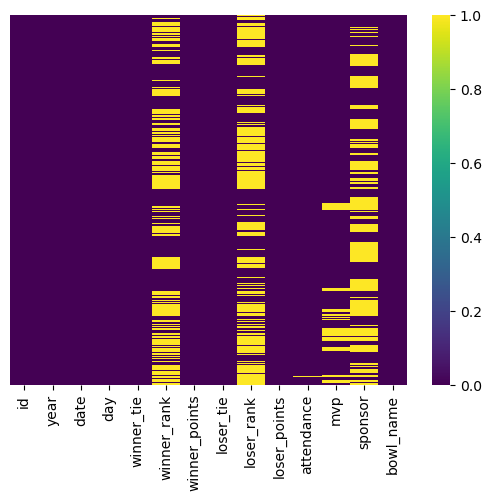

In [844]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [845]:
df.head()

,id,year,date,day,winner_tie,winner_rank,winner_points,loser_tie,loser_rank,loser_points,attendance,mvp,sponsor,bowl_name
0,1,2021,12/29/2021,Wed,Oklahoma,14,47,Oregon,15,32,59121.0,"Oklahoma RB Kennedy Brooks, Oklahoma S Pat Fields",Valero,Alamo Bowl
1,2,2020,12/29/2020,Tue,Texas,20,55,Colorado,NaN,23,10822.0,"Texas RB Bijan Robinson, Texas LB DeMarvion Ov...",Valero,Alamo Bowl
2,3,2019,12/31/2019,Tue,Texas,NaN,38,Utah,12,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",Valero,Alamo Bowl
3,4,2018,12/28/2018,Fri,Washington State,12,28,Iowa State,25,26,60675.0,"Washington State QB Gardner Minshew, Washingto...",Valero,Alamo Bowl
4,5,2017,12/28/2017,Thu,Texas Christian,13,39,Stanford,15,37,57653.0,"TCU QB Kenny Hill, TCU LB Travin Howard",Valero,Alamo Bowl


In [846]:
df.drop('winner_rank', axis=1, inplace=True)

In [847]:
df.drop('loser_rank', axis=1, inplace=True)

In [848]:
df.drop('sponsor', axis=1, inplace=True)

In [849]:
df.shape

(1527, 11)

<AxesSubplot:>

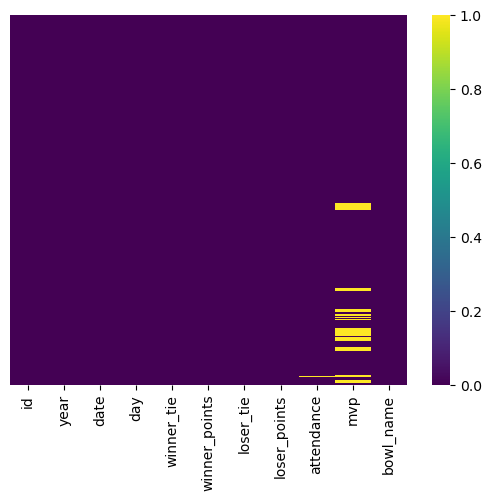

In [850]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

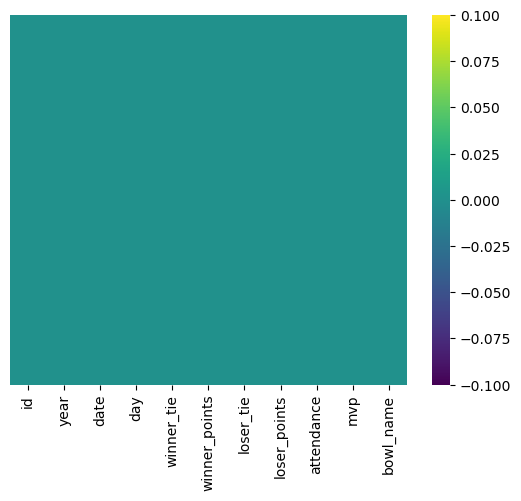

In [851]:
df.dropna(inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
day = pd.get_dummies(df['day'], drop_first=True)

In [852]:
winner_tie = pd.get_dummies(df['winner_tie'], drop_first=True)

In [853]:
loser_tie = pd.get_dummies(df['loser_tie'], drop_first=True)

In [854]:
mvp = pd.get_dummies(df['mvp'], drop_first=True)

In [855]:
bowl_name = pd.get_dummies(df['bowl_name'], drop_first=True)

In [856]:
df = pd.concat([df, day, winner_tie], axis=1)

In [857]:
df.iloc[:,162] #Wyoming last winner_tie col

0       0
1       0
2       0
3       0
4       0
       ..
1522    0
1523    0
1524    0
1525    0
1526    0
Name: Wyoming, Length: 1355, dtype: uint8

In [858]:
df = pd.concat([df, loser_tie], axis=1)
df

,id,year,date,day,winner_tie,winner_points,loser_tie,loser_points,attendance,mvp,...,Washington & Lee,Washington State,West Chester,West Virginia,Western Kentucky,Western Michigan,Wichita State,William & Mary,Wisconsin,Wyoming
0,1,2021,12/29/2021,Wed,Oklahoma,47,Oregon,32,59121.0,"Oklahoma RB Kennedy Brooks, Oklahoma S Pat Fields",...,0,0,0,0,0,0,0,0,0,0
1,2,2020,12/29/2020,Tue,Texas,55,Colorado,23,10822.0,"Texas RB Bijan Robinson, Texas LB DeMarvion Ov...",...,0,0,0,0,0,0,0,0,0,0
2,3,2019,12/31/2019,Tue,Texas,38,Utah,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",...,0,0,0,0,0,0,0,0,0,0
3,4,2018,12/28/2018,Fri,Washington State,28,Iowa State,26,60675.0,"Washington State QB Gardner Minshew, Washingto...",...,0,0,0,0,0,0,0,0,0,0
4,5,2017,12/28/2017,Thu,Texas Christian,39,Stanford,37,57653.0,"TCU QB Kenny Hill, TCU LB Travin Howard",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,12/30/2004,Thu,Northern Illinois,34,Troy,21,21456.0,"RB Dewhitt Betterson (Troy), DB Lionel Hickenb...",...,0,0,0,0,0,0,0,0,0,0
1523,1524,2003,12/30/2003,Tue,Fresno State,17,UCLA,9,20126.0,"RB Rodney Davis (Fresno State), DL Garrett McI...",...,0,0,0,0,0,0,0,0,0,0
1524,1525,2002,12/31/2002,Tue,Fresno State,30,Georgia Tech,21,10132.0,"RB Rodney Davis (Fresno State), DL Jason Stewa...",...,0,0,0,0,0,0,0,0,0,0
1525,1526,2001,12/31/2001,Mon,Michigan State,44,Fresno State,35,30456.0,"WR Charles Rogers (Michigan State), DL Nick My...",...,0,0,0,0,0,0,0,0,0,0


In [859]:
df.iloc[:,315] #Wyoming last loser_tie col

0       0
1       0
2       0
3       0
4       0
       ..
1522    0
1523    0
1524    0
1525    0
1526    0
Name: Wyoming, Length: 1355, dtype: uint8

In [860]:
df = pd.concat([df, mvp, bowl_name], axis=1)

<AxesSubplot:>

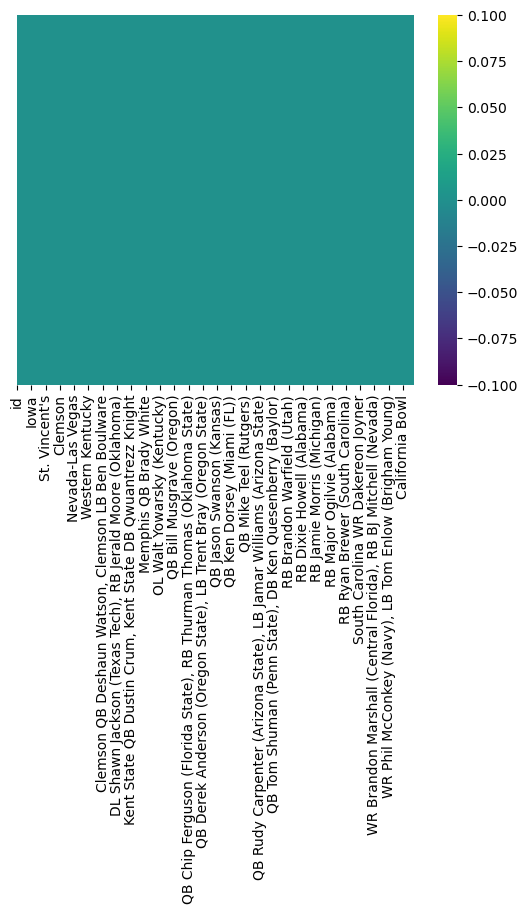

In [861]:
df.drop('day',axis=1,inplace=True)
df.drop('winner_tie',axis=1,inplace=True)
df.drop('loser_tie',axis=1,inplace=True)
df.drop('mvp',axis=1,inplace=True)
df.drop('bowl_name',axis=1,inplace=True)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [862]:
df.isnull()

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Pinstripe Bowl,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1523,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1524,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1525,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [863]:
df.dropna().shape

(1355, 1693)

In [864]:
df.shape

(1355, 1693)

In [865]:
df

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Pinstripe Bowl,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl
0,1,2021,12/29/2021,47,32,59121.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2020,12/29/2020,55,23,10822.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2019,12/31/2019,38,10,60147.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018,12/28/2018,28,26,60675.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2017,12/28/2017,39,37,57653.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,12/30/2004,34,21,21456.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1523,1524,2003,12/30/2003,17,9,20126.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1524,1525,2002,12/31/2002,30,21,10132.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1525,1526,2001,12/31/2001,44,35,30456.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [866]:
import datetime as dt
import time
def convDate(cols):
    dateComponents = cols[2].split('/')
    month = ""
    for v1 in dateComponents[0]:
        if v1 != "0":
            month += v1
            print(month)

    date = ""
    for v2 in dateComponents[1]:
        if v2 != "0":
            date += v2
            print(date)

    date_time = dt.datetime(int(dateComponents[2]), int(month), int(date))
    print(date_time)
    return time.mktime(date_time.timetuple())


df['date'] = df.apply(convDate, axis=1)

1
12
2
29
2021-12-29 00:00:00
1
12
2
29
2020-12-29 00:00:00
1
12
3
31
2019-12-31 00:00:00
1
12
2
28
2018-12-28 00:00:00
1
12
2
28
2017-12-28 00:00:00
1
12
2
29
2016-12-29 00:00:00
1
2
2016-01-02 00:00:00
1
2
2015-01-02 00:00:00
1
12
3
2013-12-03 00:00:00
1
12
2
29
2012-12-29 00:00:00
1
12
2
29
2011-12-29 00:00:00
1
12
2
29
2010-12-29 00:00:00
1
2
2010-01-02 00:00:00
1
12
2
29
2008-12-29 00:00:00
1
12
2
29
2007-12-29 00:00:00
1
12
3
2006-12-03 00:00:00
1
12
2
28
2005-12-28 00:00:00
1
12
2
29
2004-12-29 00:00:00
1
12
2
29
2003-12-29 00:00:00
1
12
2
28
2002-12-28 00:00:00
1
12
2
29
2001-12-29 00:00:00
1
12
3
2000-12-03 00:00:00
1
12
2
28
1999-12-28 00:00:00
1
12
2
29
1998-12-29 00:00:00
1
12
3
1997-12-03 00:00:00
1
12
2
29
1996-12-29 00:00:00
1
12
2
28
1995-12-28 00:00:00
1
12
3
31
1994-12-31 00:00:00
1
12
3
31
1993-12-31 00:00:00
1
12
2
22
2021-12-22 00:00:00
1
12
3
31
2020-12-31 00:00:00
1
4
2020-01-04 00:00:00
1
12
2
22
2018-12-22 00:00:00
1
12
2
23
2017-12-23 00:00:00
1
12
2
23
2016-1

In [867]:
df

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Pinstripe Bowl,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl
0,1,2021,1.640758e+09,47,32,59121.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2020,1.609222e+09,55,23,10822.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2019,1.577772e+09,38,10,60147.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018,1.545977e+09,28,26,60675.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2017,1.514441e+09,39,37,57653.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,1.102054e+09,34,21,21456.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1523,1524,2003,1.070431e+09,17,9,20126.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1524,1525,2002,1.041314e+09,30,21,10132.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1525,1526,2001,1.009778e+09,44,35,30456.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [868]:
df.dropna().shape

(1355, 1693)

In [869]:
df.shape

(1355, 1693)

<AxesSubplot:>

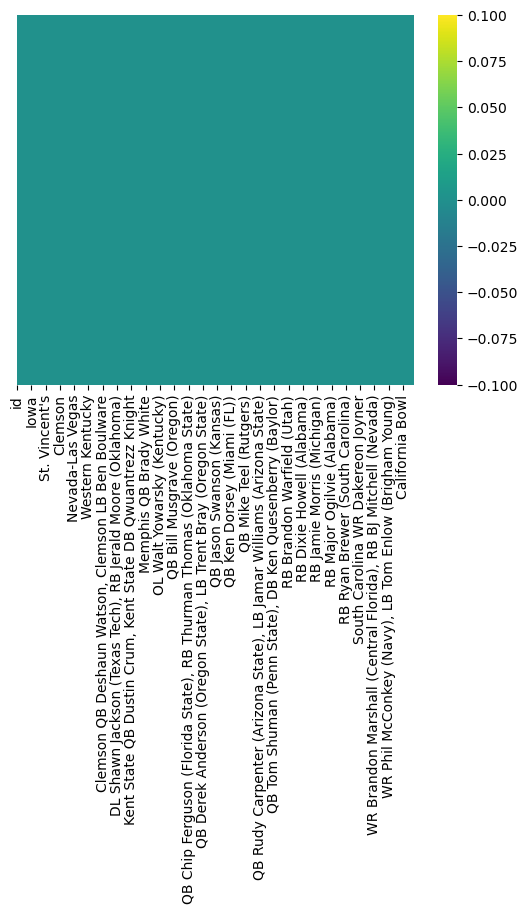

In [870]:
sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False, cbar=True)

In [871]:
from sklearn.model_selection import train_test_split

In [872]:
df

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Pinstripe Bowl,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl
0,1,2021,1.640758e+09,47,32,59121.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2020,1.609222e+09,55,23,10822.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2019,1.577772e+09,38,10,60147.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018,1.545977e+09,28,26,60675.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2017,1.514441e+09,39,37,57653.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,1.102054e+09,34,21,21456.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1523,1524,2003,1.070431e+09,17,9,20126.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1524,1525,2002,1.041314e+09,30,21,10132.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1525,1526,2001,1.009778e+09,44,35,30456.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [873]:
df.columns

Index(['id', 'year', 'date', 'winner_points', 'loser_points', 'attendance',
       'Mon', 'Sat', 'Sun', 'Thu',
       ...
       'Pinstripe Bowl', 'Poinsettia Bowl', 'Quick Lane Bowl', 'Redbox Bowl',
       'Rose Bowl', 'Silicon Valley Bowl', 'Sugar Bowl', 'Sun Bowl',
       'Texas Bowl', 'Union Home Mortgage Gasparilla Bowl'],
      dtype='object', length=1693)

In [874]:
print(df.columns)

Index(['id', 'year', 'date', 'winner_points', 'loser_points', 'attendance',
       'Mon', 'Sat', 'Sun', 'Thu',
       ...
       'Pinstripe Bowl', 'Poinsettia Bowl', 'Quick Lane Bowl', 'Redbox Bowl',
       'Rose Bowl', 'Silicon Valley Bowl', 'Sugar Bowl', 'Sun Bowl',
       'Texas Bowl', 'Union Home Mortgage Gasparilla Bowl'],
      dtype='object', length=1693)


In [875]:
def homeWin(cols):
    winPtn = cols[3]
    losePtn = cols[4]
    if winPtn > losePtn + 10:
        return 1
    else:
        return 0
    

df['landslide'] = df.apply(homeWin, axis=1)

In [876]:
df

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl,landslide
0,1,2021,1.640758e+09,47,32,59121.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2020,1.609222e+09,55,23,10822.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2019,1.577772e+09,38,10,60147.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,2018,1.545977e+09,28,26,60675.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2017,1.514441e+09,39,37,57653.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2004,1.102054e+09,34,21,21456.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1523,1524,2003,1.070431e+09,17,9,20126.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1524,1525,2002,1.041314e+09,30,21,10132.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1525,1526,2001,1.009778e+09,44,35,30456.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [877]:
x = df.drop('landslide', axis=1)
y = df['landslide']

In [878]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101) 

In [879]:
from sklearn.linear_model import LogisticRegression

In [880]:
logmodel = LogisticRegression(max_iter=10000)

In [881]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [882]:
predictions = logmodel.predict(x_test)

In [883]:
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [884]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[167  39]
 [176  25]]


              precision    recall  f1-score   support

           0       0.49      0.81      0.61       206
           1       0.39      0.12      0.19       201

    accuracy                           0.47       407
   macro avg       0.44      0.47      0.40       407
weighted avg       0.44      0.47      0.40       407



In [885]:
df.columns[12:158]

team_wins = []

for j in range(146):
    team_win = pd.DataFrame(columns=df.columns)
    for i in range(1355):
        if df.iloc[i, j+12] == 1:
                team_win.loc[len(team_win.index)] = df.iloc[i]
    print(team_win)
    print("\n")
    team_wins.append(team_win)

team_wins[1].iloc[:,13]
len(team_wins)

team_predictions_winner = []
for i in range(146):
    team_predictions_winner.append(logmodel.predict(team_wins[i].drop('landslide', axis=1)))

team_loses = []

for j in range(146):
    team_lose = pd.DataFrame(columns=df.columns)
    for i in range(1355):
        if df.iloc[i, j+158] == 1:
                team_lose.loc[len(team_lose.index)] = df.iloc[i]
    print(team_lose)
    print("\n")
    team_loses.append(team_lose)


team_predictions_loser = []
for i in range(146):
    team_predictions_loser.append(logmodel.predict(team_loses[i].drop('landslide', axis=1)))

      id    year          date  winner_points  loser_points  attendance  Mon  \
0  318.0  2015.0  1.450764e+09           23.0          21.0     18876.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        0.0  

[1 rows x 1694 columns]


        id    year          date  winner_points  loser_points  attendance  \
0    135.0  2019.0  1.577858e+09           35.0          16.0     59746.0   
1    144.0  2010.0  1.293862e+09           49.0           7.0     61519.0   
2    160.0  1994.0  7.890264e+08           24.0          17.0     71195.0   
3    210.0  2020.0  1.610345e+09           52.0          24.0     14926.0   
4    213.0  2017.0  1.515391e+09   

      id    year          date  winner_points  loser_points  attendance  Mon  \
0  129.0  2016.0  1.481954e+09           31.0          28.0     20300.0  0.0   
1  130.0  2015.0  1.450505e+09           31.0          29.0     21395.0  0.0   
2  474.0  2017.0  1.514009e+09           34.0           0.0     28706.0  0.0   
3  680.0  2020.0  1.608530e+09           56.0          28.0      5000.0  1.0   
4  699.0  2019.0  1.576908e+09           31.0          17.0     21202.0  0.0   
5  700.0  2018.0  1.544854e+09           45.0          13.0     23942.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0              0.0          0.0   
2  1.0  0.0  0.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   
4  1.0  0.0  0.0  ...              0.0              0.0          0.0   
5  1.0 

        id    year          date  winner_points  loser_points  attendance  \
0    227.0  2011.0  1.325830e+09           29.0          16.0     80956.0   
1    239.0  1999.0  9.467064e+08           27.0           6.0     72723.0   
2    263.0  1975.0  1.893240e+08           31.0          10.0     74500.0   
3    274.0  1964.0 -1.577448e+08           10.0           7.0     75504.0   
4    455.0  1959.0 -3.155112e+08           14.0           7.0     45104.0   
5    521.0  2003.0  1.072850e+09           27.0          14.0     49625.0   
6    585.0  2015.0  1.451714e+09           45.0          23.0     61136.0   
7    591.0  2009.0  1.262412e+09           20.0          17.0     62742.0   
8    648.0  2014.0  1.419833e+09           31.0           7.0     71115.0   
9    762.0  1977.0  2.525688e+08           31.0           6.0     60987.0   
10   806.0  2021.0  1.641017e+09           24.0          10.0     49577.0   
11  1107.0  1968.0 -3.151440e+07           16.0           2.0     82113.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0  1262.0  2020.0  1.609394e+09           34.0          13.0         0.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  1.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0  

[1 rows x 1694 columns]


       id    year          date  winner_points  loser_points  attendance  Mon  \
0    11.0  2011.0  1.325138e+09           67.0          56.0     65256.0  0.0   
1    96.0  2016.0  1.482818e+09           31.0          12.0     33328.0  0.0   
2   615.0  1985.0  5.045112e+08           21.0           7.0     40186.0  0.0   
3   644.0  2018.0  1.545890e+09           45.0          38.0     51104.0  0.0   
4   884.0  19

      id    year          date  winner_points  loser_points  attendance  Mon  \
0   50.0  2019.0  1.575266e+09           31.0           9.0     13547.0  0.0   
1  125.0  2020.0  1.608876e+09           17.0          10.0      2512.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0  
1                                  0.0        0.0  

[2 rows x 1694 columns]


        id    year          date  winner_points  loser_points  attendance  \
0     29.0  1993.0  7.573176e+08           37.0           3.0     45

        id    year          date  winner_points  loser_points  attendance  \
0    166.0  1988.0  5.997240e+08           13.0           6.0     53571.0   
1    167.0  1987.0  5.680152e+08           35.0          10.0     53152.0   
2    212.0  2018.0  1.546841e+09           44.0          16.0     74814.0   
3    214.0  2016.0  1.483942e+09           35.0          31.0     74512.0   
4    220.0  2018.0  1.546063e+09           30.0           3.0     72183.0   
5    299.0  1939.0 -9.467496e+08            6.0           3.0     20000.0   
6    332.0  2001.0  1.009778e+09           49.0          24.0     23472.0   
7    339.0  2019.0  1.577513e+09           29.0          23.0     71330.0   
8    342.0  2016.0  1.483164e+09           31.0           0.0     71279.0   
9    425.0  1989.0  6.286680e+08           27.0           7.0     82911.0   
10   428.0  1986.0  5.360472e+08           27.0          21.0     80104.0   
11   436.0  1978.0  2.837592e+08           17.0          15.0     72011.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    80.0  2009.0  1.262412e+09           20.0           7.0     45254.0  0.0   
1  1454.0  2008.0  1.230962e+09           38.0          20.0     40184.0  0.0   
2  1466.0  2004.0  1.104127e+09           39.0          10.0     52552.0  1.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   
2        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    86.0  2019.0  1.576908e+09           52.0          28.0     23187.0  0.0   
1    88.0  2017.0  1.513663e+09           50.0           3.0     25912.0  0.0   
2   711.0  2007.0  1.198217e+09           44.0          27.0     25146.0  0.0   
3  1462.0  2008.0  1.230271e+09           24.0          21.0     41399.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   
2        0.0        

        id    year          date  winner_points  loser_points  attendance  \
0    142.0  2012.0  1.357020e+09           45.0          31.0     59712.0   
1    146.0  2008.0  1.230790e+09           24.0          12.0     59681.0   
2    151.0  2003.0  1.072937e+09           34.0          27.0     64565.0   
3    162.0  1992.0  7.258680e+08           21.0          14.0     65861.0   
4    170.0  1984.0  4.725432e+08           17.0          17.0     51821.0   
5    209.0  2021.0  1.641017e+09           33.0          18.0     68311.0   
6    255.0  1983.0  4.418712e+08           10.0           9.0     67891.0   
7    272.0  1966.0 -9.475920e+07           24.0           9.0     75400.0   
8    399.0  2015.0  1.451714e+09           24.0          17.0     58212.0   
9    426.0  1988.0  5.996376e+08           34.0          27.0     76236.0   
10   443.0  1971.0  6.300720e+07            7.0           3.0     71208.0   
11   515.0  2009.0  1.261980e+09           44.0          20.0     49653.0   

        id    year          date  winner_points  loser_points  attendance  \
0    164.0  1990.0  6.627096e+08           45.0          21.0     72328.0   
1    284.0  1954.0 -4.733640e+08           14.0           6.0     75504.0   
2    330.0  2003.0  1.073110e+09           52.0          10.0     23118.0   
3    398.0  2016.0  1.483164e+09           33.0          18.0     43102.0   
4    416.0  1998.0  9.151704e+08           35.0          28.0     70791.0   
5    449.0  1965.0 -1.262952e+08           31.0          21.0     60127.0   
6    458.0  1956.0 -4.104648e+08           21.0          14.0     36256.0   
7    628.0  1972.0  9.350640e+07           31.0          30.0     50021.0   
8    725.0  2014.0  1.420006e+09           49.0          34.0     58211.0   
9   1007.0  1928.0 -1.293818e+09            8.0           7.0     66604.0   
10  1039.0  2004.0  1.103609e+09           51.0          14.0     28237.0   
11  1046.0  1997.0  8.833752e+08           35.0          30.0     28262.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0   165.0  1989.0  6.311736e+08           31.0          21.0     60016.0  1.0   
1   606.0  1994.0  7.888536e+08           30.0           0.0     33280.0  0.0   
2   651.0  2010.0  1.293602e+09           38.0          14.0     68211.0  0.0   
3   972.0  1963.0 -1.893672e+08           17.0           7.0     96957.0  0.0   
4   984.0  1951.0 -5.680584e+08           40.0           7.0     96825.0  0.0   
5   989.0  1946.0 -7.258248e+08           45.0          14.0     93000.0  0.0   
6  1044.0  1999.0  9.442008e+08           63.0          21.0     31089.0  0.0   
7  1355.0  2011.0  1.325311e+09           20.0          14.0     29878.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    95.0  2017.0  1.514268e+09           35.0          17.0     32859.0  0.0   
1    99.0  2013.0  1.388210e+09           31.0          14.0     53284.0  0.0   
2   119.0  1993.0  7.571448e+08           52.0          17.0     49075.0  0.0   
3   238.0  2000.0  9.783288e+08           35.0          21.0     63465.0  1.0   
4   361.0  1997.0  8.835480e+08           35.0          18.0     69367.0  0.0   
5   642.0  2021.0  1.641276e+09           42.0          20.0     52207.0  0.0   
6   646.0  2016.0  1.482905e+09           33.0          28.0     71054.0  0.0   
7  1422.0  2002.0  1.040969e+09           34.0          27.0     58717.0  0.0   
8  1425.0  1999.0  9.464472e+08           24.0          20.0     57118.0  0.0   
9  1429.0  1995.0  8.202168e+08           54.0          21.0     51051.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    35.0  2016.0  1.482473e+09           48.0          45.0     40542.0  0.0   
1   391.0  2017.0  1.512194e+09           51.0          10.0     14419.0  0.0   
2   499.0  2014.0  1.419574e+09           35.0          18.0     31297.0  0.0   
3   505.0  2019.0  1.577340e+09           14.0           0.0     33129.0  0.0   
4   516.0  2008.0  1.230444e+09           17.0          10.0     41567.0  0.0   
5   547.0  1977.0  2.511864e+08           24.0          14.0     18500.0  0.0   
6   703.0  2015.0  1.450505e+09           47.0          28.0     32487.0  0.0   
7  1388.0  2018.0  1.545458e+09           31.0          14.0     30911.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.

       id    year          date  winner_points  loser_points  attendance  Mon  \
0   715.0  2003.0  1.071554e+09           27.0          17.0     25184.0  0.0   
1  1346.0  2020.0  1.608703e+09           25.0          10.0      2979.0  0.0   
2  1465.0  2005.0  1.135577e+09           38.0          31.0     50616.0  1.0   
3  1477.0  2014.0  1.419228e+09           55.0          48.0     36742.0  1.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   
2        0.0        

        id    year          date  winner_points  loser_points  attendance  \
0     77.0  2012.0  1.357366e+09           38.0          17.0     59135.0   
1    229.0  2009.0  1.262412e+09           21.0           7.0     77928.0   
2    230.0  2008.0  1.230876e+09           47.0          34.0     88175.0   
3    235.0  2003.0  1.073023e+09           31.0          28.0     73928.0   
4    283.0  1955.0 -4.417416e+08           14.0          13.0     75504.0   
5    456.0  1958.0 -3.475656e+08            7.0           3.0     41312.0   
6    522.0  2002.0  1.040969e+09           27.0          23.0     46096.0   
7    525.0  1999.0  9.466200e+08           27.0          25.0     49873.0   
8    526.0  1998.0  9.150840e+08           35.0          18.0     46862.0   
9    538.0  1986.0  5.338872e+08           20.0          17.0     46369.0   
10   608.0  1992.0  7.257816e+08           13.0           0.0     32107.0   
11   611.0  1989.0  6.308280e+08           42.0          29.0     60128.0   

        id    year          date  winner_points  loser_points  attendance  \
0     17.0  2005.0  1.135750e+09           32.0          28.0     62000.0   
1     19.0  2003.0  1.072678e+09           17.0           3.0     56226.0   
2     22.0  2000.0  9.758232e+08           66.0          17.0     60028.0   
3    265.0  1973.0  1.262520e+08           19.0           3.0     67500.0   
4    359.0  1999.0  9.467928e+08           31.0          21.0     71526.0   
5    363.0  1995.0  8.205624e+08           62.0          24.0     79864.0   
6    401.0  2013.0  1.388556e+09           24.0          19.0     60712.0   
7    406.0  2008.0  1.230790e+09           26.0          21.0     67282.0   
8    623.0  1977.0  2.513592e+08           21.0          17.0     49456.0   
9    742.0  1997.0  8.837208e+08           42.0          17.0     74002.0   
10   743.0  1996.0  8.520120e+08           41.0          21.0     63297.0   
11   745.0  1994.0  7.889400e+08           24.0          17.0     81753.0   

        id    year          date  winner_points  loser_points  attendance  \
0    417.0  1997.0  8.836344e+08           42.0           3.0     54116.0   
1    418.0  1996.0  8.520984e+08           20.0          13.0     52103.0   
2    433.0  1981.0  3.783672e+08           31.0          27.0     71009.0   
3    435.0  1979.0  3.152088e+08           17.0          15.0     70407.0   
4    451.0  1963.0 -1.897128e+08           35.0           0.0     50018.0   
5    572.0  1998.0  9.140472e+08           20.0          13.0     21429.0   
6    666.0  2010.0  1.291356e+09           30.0          27.0     69143.0   
7    862.0  2001.0  1.009778e+09           16.0          10.0     71827.0   
8    871.0  1992.0  7.259544e+08           21.0          17.0     69125.0   
9   1048.0  1995.0  8.179704e+08           20.0          10.0     34428.0   
10  1180.0  1982.0  4.096440e+08           26.0          10.0     31359.0   
11  1190.0  1972.0  9.221040e+07           32.0          28.0     31312.0   

      id    year          date  winner_points  loser_points  attendance  Mon  \
0   52.0  2017.0  1.513922e+09           41.0           6.0     13585.0  0.0   
1  314.0  2019.0  1.578031e+09           30.0          21.0     13611.0  0.0   
2  322.0  2011.0  1.324102e+09           24.0          23.0     28076.0  0.0   
3  390.0  2018.0  1.545199e+09           27.0           0.0     11029.0  0.0   
4  512.0  2012.0  1.356674e+09           45.0          14.0     41853.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  1.0  0.0  0.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   
4  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0   

        id    year          date  winner_points  loser_points  attendance  \
0      6.0  2016.0  1.482991e+09           38.0           8.0     59815.0   
1     12.0  2010.0  1.293602e+09           36.0          10.0     57593.0   
2     98.0  2014.0  1.420178e+09           30.0          22.0     35409.0   
3    105.0  2007.0  1.199081e+09           49.0          33.0     48892.0   
4    178.0  1976.0  2.197368e+08           49.0          21.0     37812.0   
5    294.0  1944.0 -7.889004e+08           34.0           0.0     37000.0   
6    337.0  2021.0  1.641017e+09           37.0          35.0     49550.0   
7    347.0  2011.0  1.325484e+09           41.0          38.0     69927.0   
8    384.0  1974.0  1.574424e+08           16.0           6.0     50878.0   
9    430.0  1984.0  4.730616e+08           21.0          14.0     82138.0   
10   501.0  2012.0  1.357020e+09           58.0          14.0     48313.0   
11   518.0  2006.0  1.167286e+09           34.0          31.0     45054.0   

        id    year          date  winner_points  loser_points  attendance  \
0     15.0  2007.0  1.198908e+09           24.0          17.0     66166.0   
1     23.0  1999.0  9.463608e+08           24.0           0.0     65380.0   
2    145.0  2009.0  1.262326e+09           19.0          17.0     63025.0   
3    161.0  1993.0  7.574040e+08           31.0          13.0     72456.0   
4    219.0  2019.0  1.577513e+09           53.0          39.0     54828.0   
5    264.0  1974.0  1.577880e+08           41.0          20.0     67500.0   
6    267.0  1971.0  6.309360e+07           30.0           6.0     72000.0   
7    291.0  1947.0 -6.942888e+08           13.0          13.0     43000.0   
8    341.0  2017.0  1.512281e+09           35.0          28.0     61842.0   
9    362.0  1996.0  8.520984e+08           38.0          15.0     65106.0   
10   367.0  1991.0  6.942456e+08           42.0          17.0     71133.0   
11   372.0  1986.0  5.365656e+08           14.0          10.0     73098.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    67.0  2009.0  1.261202e+09           45.0          24.0     29763.0  0.0   
1    81.0  2008.0  1.230530e+09           29.0          23.0     38582.0  1.0   
2   655.0  2006.0  1.167286e+09           37.0          10.0     52210.0  0.0   
3   905.0  2011.0  1.322892e+09           27.0          13.0     38328.0  0.0   
4   913.0  2014.0  1.419574e+09           40.0          21.0     23876.0  0.0   
5  1455.0  2007.0  1.199513e+09           52.0          30.0     31455.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  1.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   
4  0.0  0.0  0.0  ...              0.0              1.0          0.0   


        id    year          date  winner_points  loser_points  attendance  \
0    244.0  1994.0  7.890264e+08           55.0          14.0     70218.0   
1    557.0  2013.0  1.387606e+09           45.0          20.0     42178.0   
2    625.0  1975.0  1.884600e+08           20.0           0.0     52129.0   
3    735.0  2004.0  1.104818e+09           55.0          19.0     77912.0   
4    737.0  2002.0  1.041487e+09           38.0          17.0     75971.0   
5    919.0  2016.0  1.483337e+09           52.0          49.0     95128.0   
6    927.0  2008.0  1.230790e+09           38.0          24.0     93293.0   
7    928.0  2007.0  1.199167e+09           49.0          17.0     93923.0   
8    929.0  2006.0  1.167631e+09           32.0          18.0     93852.0   
9    932.0  2003.0  1.072937e+09           28.0          14.0     93849.0   
10   940.0  1995.0  8.204760e+08           41.0          32.0    100102.0   
11   946.0  1989.0  6.311736e+08           17.0          10.0    103450.0   

      id    year         date  winner_points  loser_points  attendance  Mon  \
0  206.0  1948.0 -662666400.0           21.0          21.0      9000.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        0.0  

[1 rows x 1694 columns]


        id    year          date  winner_points  loser_points  attendance  \
0    111.0  2001.0  1.009606e+09           26.0           3.0     40028.0   
1    279.0  1959.0 -3.155976e+08           23.0          14.0     75504.0   
2    366.0  1992.0  7.258680e+08           26.0          22.0     70224.0   
3    419.0  1995.0  8.204760e+08           41.0           0.0     45202.0   
4    545.0  1979.0  3.140856e+08     

      id    year        date  winner_points  loser_points  attendance  Mon  \
0  187.0  1967.0 -64519200.0           25.0           8.0      5500.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0  

[1 rows x 1694 columns]


        id    year          date  winner_points  loser_points  attendance  \
0      2.0  2020.0  1.609222e+09           55.0          23.0     10822.0   
1      3.0  2019.0  1.577772e+09           38.0          10.0     60147.0   
2     10.0  2012.0  1.356761e+09           31.0          27.0     65277.0   
3     16.0  2006.0  1.165126e+09           26.0          24.0     65875.0   
4    236.0  2002.0  1.041401e+09       

        id    year          date  winner_points  loser_points  attendance  \
0      5.0  2017.0  1.514441e+09           39.0          37.0     57653.0   
1      7.0  2015.0  1.451714e+09           47.0          41.0     64569.0   
2     94.0  2018.0  1.545804e+09           10.0           7.0     33121.0   
3    282.0  1956.0 -4.102056e+08           28.0          27.0     68000.0   
4    302.0  1936.0 -1.041358e+09           16.0           6.0     17000.0   
5    492.0  1999.0  9.458424e+08           28.0          14.0     34200.0   
6    598.0  2002.0  1.041314e+09           17.0           3.0     55207.0   
7    654.0  2007.0  1.198822e+09           20.0          13.0     62097.0   
8    849.0  2014.0  1.420006e+09           42.0           3.0     65706.0   
9    925.0  2010.0  1.293862e+09           21.0          19.0     94118.0   
10  1164.0  1998.0  9.150840e+08           28.0          19.0     46612.0   
11  1447.0  2005.0  1.136009e+09           27.0          24.0     37280.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    32.0  2019.0  1.578118e+09           30.0          13.0     38513.0  0.0   
1   306.0  2018.0  1.544854e+09           41.0          24.0     19066.0  0.0   
2   602.0  1998.0  9.150840e+08           41.0          27.0     52192.0  0.0   
3   630.0  1970.0  2.982960e+07           17.0           3.0     44640.0  0.0   
4  1404.0  2002.0  1.040796e+09           36.0          28.0     31535.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  1.0  ...              0.0              0.0          0.0   
3  1.0  0.0  0.0  ...              0.0              0.0          0.0   
4  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        

      id    year          date  winner_points  loser_points  attendance  Mon  \
0   76.0  2013.0  1.388815e+09           41.0          24.0     42717.0  0.0   
1  459.0  1955.0 -4.419144e+08           25.0          13.0     32174.0  0.0   
2  664.0  2012.0  1.356934e+09           38.0          24.0     55801.0  1.0   
3  668.0  2008.0  1.230703e+09           16.0          14.0     54250.0  0.0   
4  889.0  1974.0  1.574424e+08            6.0           6.0     31695.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   
4  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0   

        id    year          date  winner_points  loser_points  attendance  \
0    498.0  2015.0  1.451110e+09           44.0          31.0     20229.0   
1    537.0  1987.0  5.668920e+08           24.0          12.0     41683.0   
2    551.0  2019.0  1.576908e+09           38.0           7.0     34197.0   
3    755.0  1984.0  4.734072e+08           28.0          17.0     56294.0   
4    935.0  2000.0  9.783288e+08           34.0          24.0     94392.0   
5    944.0  1991.0  6.942456e+08           34.0          14.0    103566.0   
6    945.0  1990.0  6.627096e+08           46.0          34.0    101273.0   
7    954.0  1981.0  3.787128e+08           28.0           0.0    105611.0   
8    958.0  1977.0  2.525688e+08           27.0          20.0    105312.0   
9    975.0  1960.0 -2.838888e+08           17.0           7.0     97314.0   
10   976.0  1959.0 -3.155976e+08           44.0           8.0    100809.0   
11  1012.0  1923.0 -1.451671e+09           14.0          14.0     40000.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0   312.0  2021.0  1.640066e+09           52.0          38.0     10217.0  0.0   
1   316.0  2017.0  1.513922e+09           37.0          14.0     16512.0  0.0   
2   464.0  1950.0 -5.995944e+08           20.0           7.0     19834.0  1.0   
3   566.0  2004.0  1.103782e+09           24.0          21.0     29062.0  0.0   
4   693.0  2009.0  1.261202e+09           35.0          28.0     24898.0  0.0   
5  1196.0  1966.0 -9.536400e+07           28.0          20.0     24381.0  0.0   
6  1204.0  1958.0 -3.472200e+08           14.0           6.0     13000.0  0.0   
7  1207.0  1955.0 -4.417416e+08           21.0          14.0     14500.0  1.0   
8  1263.0  2019.0  1.577772e+09           38.0          17.0     36892.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0       

     id    year          date  winner_points  loser_points  attendance  Mon  \
0  84.0  2021.0  1.639807e+09           59.0          38.0     15429.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0  

[1 rows x 1694 columns]


       id    year          date  winner_points  loser_points  attendance  Mon  \
0    12.0  2010.0  1.293602e+09           36.0          10.0     57593.0  0.0   
1   344.0  2014.0  1.420006e+09           38.0          30.0     66896.0  0.0   
2   379.0  1979.0  3.149496e+08           16.0          10.0     55347.0  0.0   
3  1170.0  1992.0  7.257816e+08           20.0          15.0     41622.0  0.0   
4  1177.0  1985.0

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    28.0  1994.0  7.888536e+08           10.0           3.0     44106.0  0.0   
1   121.0  1991.0  6.941592e+08           24.0           0.0     35752.0  0.0   
2   224.0  2014.0  1.420092e+09           42.0          41.0     71464.0  0.0   
3   258.0  1980.0  3.471768e+08           30.0           2.0     74281.0  0.0   
4   264.0  1974.0  1.577880e+08           41.0          20.0     67500.0  0.0   
5   345.0  2013.0  1.388556e+09           52.0          42.0     65172.0  0.0   
6   454.0  1960.0 -2.840616e+08           13.0          12.0     50122.0  0.0   
7   460.0  1954.0 -4.734504e+08           33.0          13.0     28426.0  0.0   
8   651.0  2010.0  1.293602e+09           38.0          14.0     68211.0  0.0   
9  1056.0  2019.0  1.577858e+09           26.0          14.0     55211.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0

        id    year          date  winner_points  loser_points  attendance  \
0    169.0  1985.0  5.045976e+08           10.0           7.0     50920.0   
1    178.0  1976.0  2.197368e+08           49.0          21.0     37812.0   
2    384.0  1974.0  1.574424e+08           16.0           6.0     50878.0   
3    504.0  2021.0  1.639807e+09           31.0          28.0     26276.0   
4    555.0  2015.0  1.450505e+09           35.0          28.0     42213.0   
5    562.0  2008.0  1.228198e+09           31.0          21.0     40047.0   
6    565.0  2005.0  1.135231e+09           35.0          28.0     40053.0   
7    599.0  2001.0  1.009778e+09           28.0          10.0     58968.0   
8    602.0  1998.0  9.150840e+08           41.0          27.0     52192.0   
9   1232.0  1987.0  5.671512e+08           22.0          16.0     37000.0   
10  1353.0  2013.0  1.388124e+09           31.0          16.0     34136.0   
11  1387.0  2019.0  1.577167e+09           38.0          34.0     21582.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    55.0  2014.0  1.419401e+09           49.0          48.0     13667.0  0.0   
1   316.0  2017.0  1.513922e+09           37.0          14.0     16512.0  0.0   
2   576.0  1994.0  7.874712e+08           52.0          24.0     17562.0  0.0   
3   683.0  2019.0  1.576908e+09           48.0          11.0     18823.0  0.0   
4   912.0  2015.0  1.451282e+09           21.0          14.0     34217.0  1.0   
5  1462.0  2008.0  1.230271e+09           24.0          21.0     41399.0  0.0   
6  1463.0  2007.0  1.198649e+09           51.0          48.0     60624.0  0.0   
7  1475.0  2016.0  1.482127e+09           55.0          10.0     15262.0  1.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  1.0  ...              0.0              0.

        id    year          date  winner_points  loser_points  attendance  \
0      2.0  2020.0  1.609222e+09           55.0          23.0     10822.0   
1      6.0  2016.0  1.482991e+09           38.0           8.0     59815.0   
2     20.0  2002.0  1.041055e+09           31.0          28.0     50690.0   
3    301.0  1937.0 -1.009822e+09           28.0          14.0     37000.0   
4    357.0  2001.0  1.009865e+09           38.0          16.0     74118.0   
5    366.0  1992.0  7.258680e+08           26.0          22.0     70224.0   
6    442.0  1972.0  9.221040e+07           24.0           3.0     71114.0   
7    517.0  2007.0  1.196662e+09           30.0          24.0     47043.0   
8    630.0  1970.0  2.982960e+07           17.0           3.0     44640.0   
9    750.0  1989.0  6.311736e+08           21.0           6.0     81190.0   
10   763.0  1976.0  2.209464e+08           27.0          10.0     65537.0   
11  1038.0  2005.0  1.135663e+09           19.0          10.0     31470.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    75.0  2014.0  1.420265e+09           28.0          20.0     30083.0  0.0   
1    83.0  2006.0  1.166854e+09           24.0           7.0     32023.0  0.0   
2   490.0  2001.0  1.008742e+09           64.0          61.0     40139.0  0.0   
3   492.0  1999.0  9.458424e+08           28.0          14.0     34200.0  0.0   
4   591.0  2009.0  1.262412e+09           20.0          17.0     62742.0  0.0   
5   592.0  2008.0  1.230876e+09           25.0          19.0     56125.0  0.0   
6   606.0  1994.0  7.888536e+08           30.0           0.0     33280.0  0.0   
7   706.0  2012.0  1.356156e+09           43.0          34.0     48828.0  0.0   
8  1487.0  2010.0  1.293602e+09           51.0          20.0     38062.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0       

      id    year          date  winner_points  loser_points  attendance  Mon  \
0   59.0  2017.0  1.513836e+09           28.0           3.0     16363.0  0.0   
1   65.0  2011.0  1.322806e+09           20.0          10.0     20072.0  0.0   
2  126.0  2019.0  1.576908e+09           34.0          26.0     16209.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  1.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   
2        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  1.0        1.0  
1

      id    year          date  winner_points  loser_points  attendance  Mon  \
0  305.0  2019.0  1.576908e+09           23.0          16.0     18158.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        0.0  

[1 rows x 1694 columns]


       id    year          date  winner_points  loser_points  attendance  Mon  \
0   309.0  2015.0  1.450505e+09           27.0          16.0     18536.0  0.0   
1  1263.0  2019.0  1.577772e+09           38.0          17.0     36892.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...           

        id    year          date  winner_points  loser_points  attendance  \
0    499.0  2014.0  1.419574e+09           35.0          18.0     31297.0   
1    618.0  1982.0  4.099896e+08           21.0          15.0     54123.0   
2    837.0  1990.0  6.627096e+08           30.0           0.0     63154.0   
3    878.0  1985.0  5.048568e+08           31.0          29.0     29857.0   
4    928.0  2007.0  1.199167e+09           49.0          17.0     93923.0   
5    952.0  1983.0  4.418712e+08           45.0           9.0    103217.0   
6   1074.0  2001.0  1.009865e+09           47.0          34.0     77688.0   
7   1171.0  1991.0  6.941592e+08            6.0           3.0     42281.0   
8   1231.0  1988.0  5.993784e+08           14.0          10.0     48218.0   
9   1347.0  2019.0  1.575353e+09           35.0          20.0     34177.0   
10  1432.0  1992.0  7.233624e+08           27.0          17.0     44457.0   

    Mon  Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl 

       id    year          date  winner_points  loser_points  attendance  Mon  \
0   627.0  1973.0  1.249560e+08           31.0          18.0     50011.0  1.0   
1   771.0  1968.0 -3.151440e+07           15.0          14.0     77719.0  0.0   
2  1040.0  2003.0  1.072073e+09           56.0          26.0     26482.0  1.0   
3  1187.0  1975.0  1.888056e+08           33.0          19.0     33240.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.0          0.0   
3  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   
2        0.0        

        id    year          date  winner_points  loser_points  attendance  \
0    137.0  2017.0  1.514786e+09           21.0          17.0     57726.0   
1    145.0  2009.0  1.262326e+09           19.0          17.0     63025.0   
2    150.0  2004.0  1.104559e+09           30.0          25.0     70229.0   
3    236.0  2002.0  1.041401e+09           35.0          20.0     70817.0   
4    615.0  1985.0  5.045112e+08           21.0           7.0     40186.0   
5    622.0  1978.0  2.832408e+08           20.0          15.0     53064.0   
6    642.0  2021.0  1.641276e+09           42.0          20.0     52207.0   
7    662.0  2014.0  1.417586e+09           31.0          28.0     60149.0   
8    757.0  1982.0  4.102488e+08           21.0          20.0     68713.0   
9    766.0  1973.0  1.262520e+08           16.0           9.0     60477.0   
10   769.0  1970.0  3.155760e+07           17.0          12.0     80699.0   
11   839.0  1988.0  5.997240e+08           23.0          10.0     51112.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    47.0  2004.0  1.103782e+09           32.0          14.0     27902.0  0.0   
1    57.0  2019.0  1.577081e+09           48.0          25.0     28987.0  1.0   
2   125.0  2020.0  1.608876e+09           17.0          10.0      2512.0  0.0   
3   697.0  2021.0  1.639807e+09           36.0          21.0     21642.0  0.0   
4  1473.0  1997.0  8.831160e+08           34.0          31.0     43340.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  1.0  ...              0.0              0.0          0.0   
1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  0.0  ...              0.0              0.0          0.0   
3  1.0  0.0  0.0  ...              0.0              0.0          0.0   
4  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        

        id    year          date  winner_points  loser_points  attendance  \
0     60.0  2016.0  1.482732e+09           17.0          16.0     15717.0   
1    192.0  1962.0 -2.217672e+08           49.0          21.0      7500.0   
2    356.0  2002.0  1.041574e+09           31.0          24.0     77502.0   
3    365.0  1993.0  7.574040e+08           29.0           0.0     72260.0   
4    372.0  1986.0  5.365656e+08           14.0          10.0     73098.0   
5    374.0  1984.0  4.734072e+08           39.0          37.0     60310.0   
6    472.0  2019.0  1.578290e+09           27.0          17.0     29212.0   
7    505.0  2019.0  1.577340e+09           14.0           0.0     33129.0   
8    510.0  2014.0  1.419660e+09           24.0          21.0     38242.0   
9    520.0  2004.0  1.104214e+09           17.0          13.0     43000.0   
10   639.0  1961.0 -2.538216e+08           15.0          14.0     15712.0   
11   722.0  2017.0  1.512281e+09           34.0          24.0     65326.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0   103.0  2009.0  1.262239e+09           14.0          13.0     45090.0  0.0   
1   104.0  2008.0  1.230703e+09           42.0          21.0     49103.0  0.0   
2   106.0  2006.0  1.167372e+09           44.0          41.0     48391.0  0.0   
3   140.0  2014.0  1.420092e+09           33.0          17.0     48624.0  0.0   
4   614.0  1986.0  5.362200e+08           21.0          14.0     51327.0  1.0   
5   649.0  2012.0  1.356674e+09           34.0          31.0     50386.0  0.0   
6   671.0  2005.0  1.133590e+09           34.0          31.0     40519.0  0.0   
7   975.0  1960.0 -2.838888e+08           17.0           7.0     97314.0  1.0   
8  1043.0  2000.0  9.779832e+08           38.0          30.0     28359.0  0.0   
9  1163.0  1999.0  9.466200e+08           24.0          20.0     48757.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  1.0  ...              0

      id    year         date  winner_points  loser_points  attendance  Mon  \
0  206.0  1948.0 -662666400.0           21.0          21.0      9000.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        0.0  

[1 rows x 1694 columns]


       id    year          date  winner_points  loser_points  attendance  Mon  \
0    35.0  2016.0  1.482473e+09           48.0          45.0     40542.0  0.0   
1   275.0  1963.0 -1.893672e+08           28.0           6.0     75504.0  0.0   
2   619.0  1981.0  3.762072e+08           31.0          28.0     43216.0  0.0   
3  1012.0  1923.0 -1.451671e+09           14.0          14.0     40000.0  0.0   
4  1291.0  2006.0

        id    year          date  winner_points  loser_points  attendance  \
0    289.0  1949.0 -6.310440e+08           27.0          13.0     75347.0   
1    310.0  2021.0  1.638511e+09           38.0          21.0     45520.0   
2    421.0  1993.0  7.573176e+08           24.0          10.0     67205.0   
3    443.0  1971.0  6.300720e+07            7.0           3.0     71208.0   
4    513.0  2011.0  1.324879e+09           41.0          24.0     41728.0   
5    623.0  1977.0  2.513592e+08           21.0          17.0     49456.0   
6    719.0  2020.0  1.609567e+09           41.0          27.0     13737.0   
7    880.0  1983.0  4.392792e+08           28.0           3.0     25648.0   
8    887.0  1976.0  2.208600e+08           21.0           0.0     54132.0   
9    893.0  1970.0  2.905200e+07           48.0          26.0     52126.0   
10   913.0  2014.0  1.419574e+09           40.0          21.0     23876.0   
11  1028.0  2015.0  1.451369e+09           49.0          38.0     40418.0   

        id    year          date  winner_points  loser_points  attendance  \
0    108.0  2004.0  1.104214e+09           38.0          21.0     45917.0   
1    220.0  2018.0  1.546063e+09           30.0           3.0     72183.0   
2    251.0  1987.0  5.680152e+08           35.0          10.0     73006.0   
3    269.0  1969.0  2.160000e+04           21.0          17.0     73000.0   
4    337.0  2021.0  1.641017e+09           37.0          35.0     49550.0   
5    343.0  2015.0  1.451628e+09           44.0          28.0     71123.0   
6    353.0  2005.0  1.136182e+09           34.0          20.0     76196.0   
7    358.0  2000.0  9.783288e+08           41.0           9.0     75428.0   
8    364.0  1994.0  7.890264e+08           41.0          24.0     73968.0   
9    412.0  2002.0  1.041401e+09           28.0           6.0     73491.0   
10   416.0  1998.0  9.151704e+08           35.0          28.0     70791.0   
11   527.0  1997.0  8.832888e+08           27.0           9.0     50459.0   

      id    year          date  winner_points  loser_points  attendance  Mon  \
0  679.0  2021.0  1.638425e+09           30.0          17.0      6557.0  1.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0  

[1 rows x 1694 columns]


        id    year          date  winner_points  loser_points  attendance  \
0      1.0  2021.0  1.640758e+09           47.0          32.0     59121.0   
1      7.0  2015.0  1.451714e+09           47.0          41.0     64569.0   
2    216.0  2014.0  1.421042e+09           42.0          20.0     85689.0   
3    243.0  1995.0  8.204760e+08           38.0           6.0     58214.0   
4    290.0  1948.0 -6.626664e+08   

        id    year          date  winner_points  loser_points  attendance  \
0    136.0  2018.0  1.546322e+09           27.0          24.0     59167.0   
1    152.0  2002.0  1.041401e+09           13.0           9.0     66334.0   
2    157.0  1997.0  8.836344e+08           21.0           6.0     72940.0   
3    167.0  1987.0  5.680152e+08           35.0          10.0     53152.0   
4    399.0  2015.0  1.451714e+09           24.0          17.0     58212.0   
5    438.0  1976.0  2.205144e+08           20.0           9.0     67827.0   
6    452.0  1962.0 -2.211624e+08           17.0           7.0     50026.0   
7    502.0  2011.0  1.325484e+09           30.0          14.0     46817.0   
8    754.0  1985.0  5.049432e+08           25.0          10.0     74178.0   
9    806.0  2021.0  1.641017e+09           24.0          10.0     49577.0   
10   817.0  2010.0  1.293862e+09           37.0          24.0     60574.0   
11   919.0  2016.0  1.483337e+09           52.0          49.0     95128.0   

      id    year         date  winner_points  loser_points  attendance  Mon  \
0  295.0  1943.0 -820522800.0            7.0           7.0     32000.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  1.0  0.0  0.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        0.0  

[1 rows x 1694 columns]


       id    year          date  winner_points  loser_points  attendance  Mon  \
0   281.0  1957.0 -3.786696e+08           20.0           7.0     75504.0  0.0   
1   587.0  2013.0  1.388470e+09           44.0           7.0     57846.0  0.0   
2   712.0  2006.0  1.166767e+09           41.0          17.0     24791.0  0.0   
3  1115.0  1960.0 -2.838888e+08           14.0           6.0     82851.0  1.0   

   Sat  Sun  Thu

        id    year          date  winner_points  loser_points  attendance  \
0      5.0  2017.0  1.514441e+09           39.0          37.0     57653.0   
1    347.0  2011.0  1.325484e+09           41.0          38.0     69927.0   
2    428.0  1986.0  5.360472e+08           27.0          21.0     80104.0   
3    605.0  1995.0  8.179704e+08           19.0          13.0     47398.0   
4    922.0  2013.0  1.388556e+09           24.0          20.0     95173.0   
5    936.0  1999.0  9.467064e+08           17.0           9.0     93731.0   
6    984.0  1951.0 -5.680584e+08           40.0           7.0     96825.0   
7   1001.0  1934.0 -1.104516e+09           29.0          13.0     84474.0   
8   1002.0  1933.0 -1.136052e+09            7.0           0.0     35000.0   
9   1011.0  1924.0 -1.420049e+09           27.0          10.0     53000.0   
10  1021.0  1901.0 -2.145895e+09           49.0           0.0      8000.0   
11  1153.0  2009.0  1.262239e+09           31.0          27.0     53713.0   

      id    year         date  winner_points  loser_points  attendance  Mon  \
0  194.0  1960.0 -286480800.0           27.0           0.0     13000.0  0.0   
1  202.0  1952.0 -536436000.0           33.0           0.0     12340.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  0.0  1.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        1.0  
1                                  0.0        1.0  

[2 rows x 1694 columns]


        id    year          date  winner_points  loser_points  attendance  \
0      9.0  2013.0  1.386050e+09           30.0           7.0     65918

        id    year          date  winner_points  loser_points  attendance  \
0     48.0  2003.0  1.072159e+09           34.0          31.0     38028.0   
1    100.0  2012.0  1.356761e+09           17.0          16.0     44617.0   
2    280.0  1958.0 -3.471336e+08            0.0           0.0     75504.0   
3    283.0  1955.0 -4.417416e+08           14.0          13.0     75504.0   
4    287.0  1951.0 -5.680584e+08           20.0           7.0     75347.0   
5    294.0  1944.0 -7.889004e+08           34.0           0.0     37000.0   
6    349.0  2009.0  1.262585e+09           17.0          10.0     73227.0   
7    491.0  2000.0  9.757368e+08           28.0          21.0     40300.0   
8    530.0  1994.0  7.885944e+08           20.0          10.0     27242.0   
9    584.0  2016.0  1.480745e+09           31.0          23.0     51087.0   
10   798.0  1941.0 -8.835912e+08           40.0          26.0     35786.0   
11  1197.0  1965.0 -1.262952e+08           13.0          12.0     27450.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0   482.0  2009.0  1.262758e+09           44.0          41.0     34486.0  0.0   
1   710.0  2008.0  1.229839e+09           30.0          27.0     30197.0  0.0   
2  1523.0  2004.0  1.102054e+09           34.0          21.0     21456.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  0.0  1.0  0.0  ...              0.0              0.0          0.0   
2  0.0  0.0  1.0  ...              0.0              0.0          0.0   

   Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
0        0.0                  0.0         0.0       0.0         0.0   
1        0.0                  0.0         0.0       0.0         0.0   
2        0.0                  1.0         0.0       0.0         0.0   

   Union Home Mortgage Gasparilla Bowl  landslide  
0                                  0.0        0.0

        id    year          date  winner_points  loser_points  attendance  \
0    165.0  1989.0  6.311736e+08           31.0          21.0     60016.0   
1    329.0  2004.0  1.104127e+09           37.0          34.0     28516.0   
2    407.0  2007.0  1.199167e+09           31.0          28.0     60243.0   
3    423.0  1991.0  6.939864e+08           48.0          14.0     62003.0   
4    720.0  2019.0  1.575353e+09           36.0          28.0     65157.0   
5    852.0  2011.0  1.325311e+09           43.0          24.0     72919.0   
6    865.0  1998.0  9.150840e+08           35.0          33.0     72876.0   
7   1044.0  1999.0  9.442008e+08           63.0          21.0     31089.0   
8   1047.0  1996.0  8.516664e+08           31.0          21.0     46418.0   
9   1050.0  1993.0  7.574040e+08           31.0          13.0     38516.0   
10  1085.0  1990.0  6.627096e+08           23.0          22.0     75132.0   
11  1480.0  2017.0  1.514441e+09           49.0           7.0     35921.0   

       id    year          date  winner_points  loser_points  attendance  Mon  \
0    93.0  2019.0  1.577426e+09           31.0          21.0     34105.0  0.0   
1   689.0  2013.0  1.387606e+09           48.0          45.0     27104.0  0.0   
2   933.0  2002.0  1.041401e+09           34.0          14.0     86848.0  0.0   
3   938.0  1997.0  8.836344e+08           21.0          16.0    101219.0  0.0   
4  1005.0  1930.0 -1.230746e+09           24.0           0.0     60000.0  0.0   
5  1142.0  2021.0  1.640930e+09           24.0          21.0     34540.0  0.0   
6  1407.0  2017.0  1.514441e+09           42.0          17.0     47092.0  0.0   
7  1408.0  2016.0  1.482818e+09           17.0          12.0     48704.0  0.0   
8  1443.0  1981.0  3.775032e+08           38.0          36.0     52419.0  0.0   

   Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
1  1.0  0.0  0.0  ...              0.0       

In [886]:
df.iloc[:,12]

0       0
1       0
2       0
3       0
4       0
       ..
1522    0
1523    0
1524    0
1525    0
1526    0
Name: Akron, Length: 1355, dtype: uint8

In [887]:
team_predictions_winner

[array([0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0]),
 array([0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0]),
 array([0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([1]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([0]),
 array([0, 0, 0, 1, 0, 0, 

In [888]:
def calc_landslide_rate(team_predictions):
    landslide_rate = []
    for i in range(len(team_predictions)):
        avg = 0
        for j in range(len(team_predictions[i])):
            avg += team_predictions[i][j]
        avg /= len(team_predictions[i])
        landslide_rate.append(avg)
    return landslide_rate

landslide_rate_win = calc_landslide_rate(team_predictions_winner)
landslide_rate_lose = calc_landslide_rate(team_predictions_loser)

In [889]:
team_wins[3]

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl,landslide
0,129.0,2016.0,1.481954e+09,31.0,28.0,20300.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,130.0,2015.0,1.450505e+09,31.0,29.0,21395.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,474.0,2017.0,1.514009e+09,34.0,0.0,28706.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,680.0,2020.0,1.608530e+09,56.0,28.0,5000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,699.0,2019.0,1.576908e+09,31.0,17.0,21202.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,700.0,2018.0,1.544854e+09,45.0,13.0,23942.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [890]:
len(landslide_rate_lose)

146

In [891]:
print(landslide_rate_win, landslide_rate_lose)

[0.0, 0.21951219512195122, 0.0, 0.0, 0.0, 0.0, 0.23076923076923078, 0.0, 0.0, 0.08695652173913043, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 1.0, 0.0, 1.0, 0.08333333333333333, 0.0, 0.14285714285714285, 0.0, 1.0, 0.0, 0.25, 0.25, 0.0, 0.20833333333333334, 0.0, 0.0, 0.03571428571428571, 0.0, 1.0, 0.12121212121212122, 0.0, 0.0, 0.3888888888888889, 1.0, 0.0, 0.125, 0.0, 0.375, 0.0, 0.11764705882352941, 0.0, 0.0, 0.0, 0.0, 0.2, 1.0, 0.0, 0.0, 0.25925925925925924, 0.0, 0.09090909090909091, 0.0, 0.25, 0.0, 0.0, 0.08333333333333333, 0.2, 0.14285714285714285, 0.25, 0.1, 0.3333333333333333, 0.08333333333333333, 0.16666666666666666, 1.0, 1.0, 0.16666666666666666, 0.043478260869565216, 1.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.07142857142857142, 0.058823529411764705, 0.0, 0.0, 0.16666666666666666, 0.05263157894736842, 0.0, 0.14814814814814814, 0.14814814814814814, 0.05555555555555555, 0.0, 0.13333333333333333, 0.2222222222222222, 1.0, 0.1935483870967742, 0.07142857142

In [892]:
landslideLogDf = pd.DataFrame({'team_name': winner_tie.columns, 'prob_landslide_winning': landslide_rate_win,
                               'prob_landslide_losing': landslide_rate_lose},
                             columns=['team_name','prob_landslide_winning', 'prob_landslide_losing'])

In [893]:
landslideLogDf

,team_name,prob_landslide_winning,prob_landslide_losing
0,Akron,0.000000,0.000000
1,Alabama,0.219512,0.333333
2,Alabama-Birmingham,0.000000,0.000000
3,Appalachian State,0.000000,0.000000
4,Arizona,0.000000,0.111111
...,...,...,...
141,West Virginia,0.090909,0.000000
142,Western Kentucky,0.166667,0.222222
143,Western Michigan,0.000000,1.000000
144,Wisconsin,0.000000,0.111111


In [894]:
landslideLogDf.to_csv('FB_predictions/landslide_probability_logistic.csv', index=False)

In [895]:
from sklearn.neighbors import KNeighborsClassifier

In [896]:
from sklearn.preprocessing import StandardScaler

In [897]:
scaler = StandardScaler()

In [898]:
scaler.fit(df.drop('landslide', axis=1))

StandardScaler()

In [899]:
scaled_features = scaler.transform(df.drop('landslide', axis=1))

In [900]:
scaled_features

array([[-1.65606428,  1.17552667,  1.17607977, ..., -0.23689338,
        -0.10217617, -0.09842273],
       [-1.653725  ,  1.13022151,  1.13079807, ..., -0.23689338,
        -0.10217617, -0.09842273],
       [-1.65138571,  1.08491636,  1.08564044, ..., -0.23689338,
        -0.10217617, -0.09842273],
       ...,
       [ 1.90900757,  0.31472872,  0.31535537, ..., -0.23689338,
        -0.10217617, -0.09842273],
       [ 1.91134685,  0.26942357,  0.27007367, ..., -0.23689338,
        -0.10217617, -0.09842273],
       [ 1.91368614,  0.22411842,  0.22479198, ..., -0.23689338,
        -0.10217617, -0.09842273]])

In [901]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [902]:
x_KNN = df_feat
y_KNN = df['landslide']
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(x,y, test_size=0.3, random_state=101)

In [903]:
error_rate = []
for i in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_KNN, y_train_KNN)
    predictions = knn.predict(x_test_KNN)
    error_rate.append(np.mean(predictions != y_test_KNN))


/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [904]:
predictions = knn.predict(x_test_KNN)

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [905]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0, 0.5, 'Error Rate')

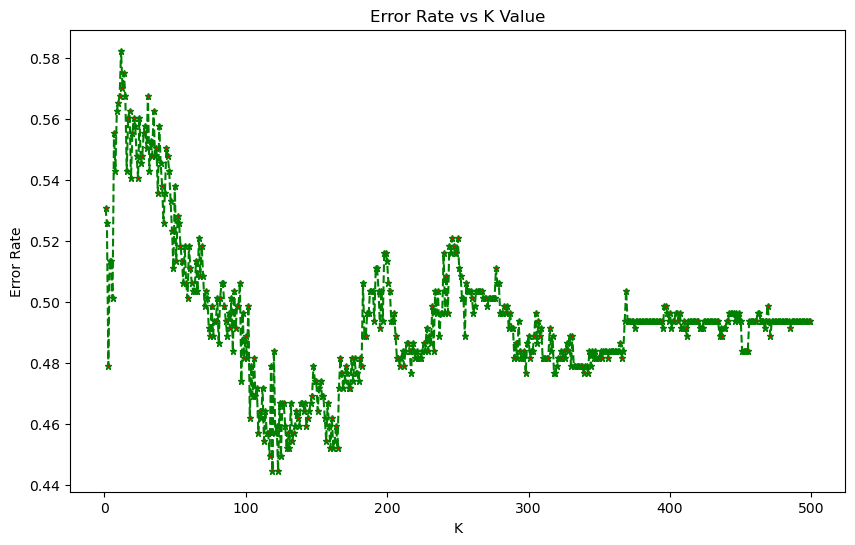

In [906]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500), error_rate, color='green', linestyle='dashed', marker='*', markerfacecolor='red',markersize='5')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [907]:
error_rate.index(min(error_rate))

118

In [908]:
scaler2 = StandardScaler()
knn2 = KNeighborsClassifier(n_neighbors=118)
knn2.fit(x_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=118)

In [909]:
landslide_predictions_win_knn = []
landslide_predictions_lose_knn = []
for i in range(len(team_wins)):
    landslide_predictions_win_knn.append(knn2.predict(team_wins[i].drop('landslide', axis=1)))
    landslide_predictions_lose_knn.append(knn2.predict(team_loses[i].drop('landslide', axis=1)))

    

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/junhyunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [910]:
print(classification_report(team_wins[0]['landslide'], landslide_predictions_win_knn[0]))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [911]:
print(confusion_matrix(team_wins[0]['landslide'], landslide_predictions_win_knn[0]))

[[1]]


In [912]:
landslide_rate_win_knn = calc_landslide_rate(landslide_predictions_win_knn)
landslide_rate_lose_knn = calc_landslide_rate(landslide_predictions_lose_knn)

In [913]:
landslideKnnDf = pd.DataFrame({'team_name': winner_tie.columns, 'prob_landslide_winning': landslide_rate_win_knn,
                               'prob_landslide_losing': landslide_rate_lose_knn},
                             columns=['team_name','prob_landslide_winning', 'prob_landslide_losing'])

In [914]:
landslideKnnDf

,team_name,prob_landslide_winning,prob_landslide_losing
0,Akron,0.000000,0.000000
1,Alabama,0.243902,0.222222
2,Alabama-Birmingham,0.500000,0.333333
3,Appalachian State,0.333333,1.000000
4,Arizona,0.500000,0.333333
...,...,...,...
141,West Virginia,0.272727,0.400000
142,Western Kentucky,0.333333,0.444444
143,Western Michigan,0.500000,0.000000
144,Wisconsin,0.555556,0.333333


In [915]:
landslideKnnDf.to_csv('FB_predictions/landslide_probability_knn.csv', index=False)

In [916]:
from sklearn.ensemble import RandomForestClassifier

In [917]:
rfc = RandomForestClassifier(n_estimators=1000)

In [918]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [919]:
landslide_predictions_win_rfc = []
landslide_predictions_lose_rfc = []
for i in range(len(team_wins)):
    landslide_predictions_win_rfc.append(rfc.predict(team_wins[i].drop('landslide', axis=1)))
    landslide_predictions_lose_rfc.append(rfc.predict(team_loses[i].drop('landslide', axis=1)))

    

In [920]:
landslide_rate_win_rfc = calc_landslide_rate(landslide_predictions_win_rfc)
landslide_rate_lose_rfc = calc_landslide_rate(landslide_predictions_lose_rfc)

In [921]:
landslide_rate_win_rfc

[0.0,
 0.6097560975609756,
 0.5,
 0.6666666666666666,
 0.25,
 0.38461538461538464,
 0.6923076923076923,
 0.25,
 0.16666666666666666,
 0.34782608695652173,
 1.0,
 0.5,
 0.4166666666666667,
 0.3333333333333333,
 0.3333333333333333,
 0.0,
 0.4666666666666667,
 0.5,
 0.5,
 0.5,
 0.0,
 1.0,
 0.375,
 1.0,
 0.4166666666666667,
 0.0,
 0.42857142857142855,
 0.3333333333333333,
 0.0,
 1.0,
 0.5,
 0.5,
 0.0,
 0.5833333333333334,
 0.75,
 0.0,
 0.6071428571428571,
 0.3,
 0.0,
 0.30303030303030304,
 0.6666666666666666,
 0.5,
 0.3888888888888889,
 0.0,
 0.42857142857142855,
 0.5,
 0.3333333333333333,
 0.625,
 0.6666666666666666,
 0.4117647058823529,
 0.2,
 0.6666666666666666,
 0.7,
 0.0,
 0.2,
 0.0,
 0.3333333333333333,
 0.2857142857142857,
 0.5925925925925926,
 0.375,
 0.45454545454545453,
 0.5,
 0.5833333333333334,
 0.0,
 0.25,
 0.625,
 0.4,
 0.14285714285714285,
 0.0,
 0.4,
 0.4166666666666667,
 0.16666666666666666,
 0.4166666666666667,
 0.0,
 0.0,
 0.5833333333333334,
 0.5652173913043478,
 0.0,
 

In [922]:
landslideRFCDf = pd.DataFrame({'team_name': winner_tie.columns, 'prob_landslide_winning': landslide_rate_win_rfc,
                               'prob_landslide_losing': landslide_rate_lose_rfc},
                             columns=['team_name','prob_landslide_winning', 'prob_landslide_losing'])

In [923]:
landslideKnnDf


,team_name,prob_landslide_winning,prob_landslide_losing
0,Akron,0.000000,0.000000
1,Alabama,0.243902,0.222222
2,Alabama-Birmingham,0.500000,0.333333
3,Appalachian State,0.333333,1.000000
4,Arizona,0.500000,0.333333
...,...,...,...
141,West Virginia,0.272727,0.400000
142,Western Kentucky,0.333333,0.444444
143,Western Michigan,0.500000,0.000000
144,Wisconsin,0.555556,0.333333


In [924]:
landslideKnnDf.to_csv('FB_predictions/landslide_probability_rfc.csv', index=False)

In [925]:
from sklearn.svm import SVC

In [926]:
c = []
gamma = []
for i in range(1,1001,5):
    c.append(0.001*i)
    gamma.append(1/i)
param_grid = {'C': c, 'gamma': gamma}

In [927]:
param_grid

{'C': [0.001,
  0.006,
  0.011,
  0.016,
  0.021,
  0.026000000000000002,
  0.031,
  0.036000000000000004,
  0.041,
  0.046,
  0.051000000000000004,
  0.056,
  0.061,
  0.066,
  0.07100000000000001,
  0.076,
  0.081,
  0.08600000000000001,
  0.091,
  0.096,
  0.101,
  0.106,
  0.111,
  0.116,
  0.121,
  0.126,
  0.131,
  0.136,
  0.14100000000000001,
  0.146,
  0.151,
  0.156,
  0.161,
  0.166,
  0.171,
  0.176,
  0.181,
  0.186,
  0.191,
  0.196,
  0.201,
  0.20600000000000002,
  0.211,
  0.216,
  0.221,
  0.226,
  0.231,
  0.23600000000000002,
  0.241,
  0.246,
  0.251,
  0.256,
  0.261,
  0.266,
  0.271,
  0.276,
  0.281,
  0.28600000000000003,
  0.291,
  0.296,
  0.301,
  0.306,
  0.311,
  0.316,
  0.321,
  0.326,
  0.331,
  0.336,
  0.341,
  0.34600000000000003,
  0.35100000000000003,
  0.356,
  0.361,
  0.366,
  0.371,
  0.376,
  0.381,
  0.386,
  0.391,
  0.396,
  0.401,
  0.406,
  0.41100000000000003,
  0.41600000000000004,
  0.421,
  0.426,
  0.431,
  0.436,
  0.441,
  0.446,


In [928]:
from sklearn.model_selection import GridSearchCV

In [929]:
grid = GridSearchCV(SVC(), {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}, verbose=10000, refit=True)

In [930]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=0.1, gamma=1.............................................
[CV 1/5; 1/25] END ..............C=0.1, gamma=1;, score=0.511 total time=   0.3s
[CV 2/5; 1/25] START C=0.1, gamma=1.............................................
[CV 2/5; 1/25] END ..............C=0.1, gamma=1;, score=0.511 total time=   0.3s
[CV 3/5; 1/25] START C=0.1, gamma=1.............................................
[CV 3/5; 1/25] END ..............C=0.1, gamma=1;, score=0.511 total time=   0.3s
[CV 4/5; 1/25] START C=0.1, gamma=1.............................................
[CV 4/5; 1/25] END ..............C=0.1, gamma=1;, score=0.508 total time=   0.4s
[CV 5/5; 1/25] START C=0.1, gamma=1.............................................
[CV 5/5; 1/25] END ..............C=0.1, gamma=1;, score=0.508 total time=   0.3s
[CV 1/5; 2/25] START C=0.1, gamma=0.1...........................................
[CV 1/5; 2/25] END ............C=0.1, gamma=0.1

[CV 1/5; 11/25] END ..............C=10, gamma=1;, score=0.511 total time=   0.3s
[CV 2/5; 11/25] START C=10, gamma=1.............................................
[CV 2/5; 11/25] END ..............C=10, gamma=1;, score=0.511 total time=   0.3s
[CV 3/5; 11/25] START C=10, gamma=1.............................................
[CV 3/5; 11/25] END ..............C=10, gamma=1;, score=0.511 total time=   0.3s
[CV 4/5; 11/25] START C=10, gamma=1.............................................
[CV 4/5; 11/25] END ..............C=10, gamma=1;, score=0.508 total time=   0.3s
[CV 5/5; 11/25] START C=10, gamma=1.............................................
[CV 5/5; 11/25] END ..............C=10, gamma=1;, score=0.508 total time=   0.3s
[CV 1/5; 12/25] START C=10, gamma=0.1...........................................
[CV 1/5; 12/25] END ............C=10, gamma=0.1;, score=0.511 total time=   0.3s
[CV 2/5; 12/25] START C=10, gamma=0.1...........................................
[CV 2/5; 12/25] END ........

[CV 2/5; 21/25] END ............C=1000, gamma=1;, score=0.511 total time=   0.4s
[CV 3/5; 21/25] START C=1000, gamma=1...........................................
[CV 3/5; 21/25] END ............C=1000, gamma=1;, score=0.511 total time=   0.3s
[CV 4/5; 21/25] START C=1000, gamma=1...........................................
[CV 4/5; 21/25] END ............C=1000, gamma=1;, score=0.508 total time=   0.3s
[CV 5/5; 21/25] START C=1000, gamma=1...........................................
[CV 5/5; 21/25] END ............C=1000, gamma=1;, score=0.508 total time=   0.4s
[CV 1/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 1/5; 22/25] END ..........C=1000, gamma=0.1;, score=0.511 total time=   0.4s
[CV 2/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 2/5; 22/25] END ..........C=1000, gamma=0.1;, score=0.511 total time=   0.3s
[CV 3/5; 22/25] START C=1000, gamma=0.1.........................................
[CV 3/5; 22/25] END ........

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=10000)

In [931]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [932]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [933]:
from sklearn.cluster import KMeans

In [934]:
kmeans = KMeans(n_clusters=2)

In [935]:
kmeans.fit(x_train, y_train)

KMeans(n_clusters=2)

In [936]:
print(classification_report(y_train, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.50      0.69      0.58       483
           1       0.47      0.28      0.35       465

    accuracy                           0.49       948
   macro avg       0.48      0.49      0.46       948
weighted avg       0.48      0.49      0.47       948



In [937]:
landslide_predictions_win_svc = []
landslide_predictions_lose_svc = []
for i in range(len(team_wins)):
    landslide_predictions_win_svc.append(grid.predict(team_wins[i].drop('landslide', axis=1)))
    landslide_predictions_lose_svc.append(grid.predict(team_loses[i].drop('landslide', axis=1)))

landslide_rate_win_svc = calc_landslide_rate(landslide_predictions_win_svc)
landslide_rate_lose_svc = calc_landslide_rate(landslide_predictions_lose_svc)
    

In [938]:
landslide_rate_win_svc

[0.0,
 0.3902439024390244,
 0.5,
 0.5,
 0.125,
 0.23076923076923078,
 0.5384615384615384,
 0.0,
 0.0,
 0.30434782608695654,
 1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.0,
 0.0,
 0.4666666666666667,
 0.5,
 0.25,
 0.16666666666666666,
 0.0,
 1.0,
 0.375,
 0.0,
 0.25,
 0.0,
 0.42857142857142855,
 0.3333333333333333,
 0.0,
 1.0,
 0.0,
 0.5,
 0.0,
 0.4583333333333333,
 0.25,
 0.0,
 0.39285714285714285,
 0.3,
 0.0,
 0.24242424242424243,
 0.6666666666666666,
 0.5,
 0.1111111111111111,
 0.0,
 0.2857142857142857,
 0.125,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 0.29411764705882354,
 0.0,
 0.3333333333333333,
 0.6,
 0.0,
 0.2,
 0.0,
 0.3333333333333333,
 0.0,
 0.4444444444444444,
 0.25,
 0.36363636363636365,
 0.4166666666666667,
 0.5833333333333334,
 0.0,
 0.25,
 0.375,
 0.25,
 0.07142857142857142,
 0.0,
 0.3,
 0.375,
 0.16666666666666666,
 0.3333333333333333,
 0.0,
 0.0,
 0.3333333333333333,
 0.391304347826087,
 0.0,
 0.16666666666666666,
 1.0,
 0.0,
 0.0,
 0.14285714285714285,
 0.411764

In [939]:
landslide_rate_lose_svc

[0.0,
 0.3333333333333333,
 1.0,
 1.0,
 0.3333333333333333,
 0.46153846153846156,
 0.2692307692307692,
 0.25,
 0.0,
 0.3157894736842105,
 0.5,
 0.6,
 0.42857142857142855,
 0.3333333333333333,
 0.5,
 0.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.0,
 0.18181818181818182,
 0.2857142857142857,
 0.375,
 1.0,
 0.18181818181818182,
 0.3333333333333333,
 1.0,
 0.0,
 0.46153846153846156,
 0.6,
 0.3333333333333333,
 0.0,
 1.0,
 0.2857142857142857,
 0.4444444444444444,
 0.0,
 0.25,
 0.5,
 0.4,
 1.0,
 0.3333333333333333,
 0.2222222222222222,
 0.0,
 0.2,
 1.0,
 0.2631578947368421,
 0.0,
 0.5,
 0.4444444444444444,
 0.0,
 0.5,
 0.42857142857142855,
 0.36363636363636365,
 0.2,
 0.375,
 0.36363636363636365,
 0.0,
 0.5,
 0.3076923076923077,
 0.0,
 0.2857142857142857,
 0.5,
 0.42105263157894735,
 0.6,
 1.0,
 0.3333333333333333,
 1.0,
 0.0,
 0.2,
 0.45454545454545453,
 0.0,
 0.5,
 0.625,
 0.041666666666666664,
 0.2857142857142857,
 0.21428571428571427,
 0.2857142857142857,
 0.1,
 0.5454545454545

In [940]:
landslideSVCDf = pd.DataFrame({'team_name': winner_tie.columns, 'prob_landslide_winning': landslide_rate_win_svc,
                               'prob_landslide_losing': landslide_rate_lose_svc},
                             columns=['team_name','prob_landslide_winning', 'prob_landslide_losing'])

In [941]:
landslideSVCDf

,team_name,prob_landslide_winning,prob_landslide_losing
0,Akron,0.000000,0.000000
1,Alabama,0.390244,0.333333
2,Alabama-Birmingham,0.500000,1.000000
3,Appalachian State,0.500000,1.000000
4,Arizona,0.125000,0.333333
...,...,...,...
141,West Virginia,0.272727,0.200000
142,Western Kentucky,0.500000,0.388889
143,Western Michigan,1.000000,0.000000
144,Wisconsin,0.111111,0.222222


In [942]:
landslideSVCDf.to_csv('FB_predictions/landslide_probability_SVC.csv', index=False)

In [943]:
team_loses

[       id    year          date  winner_points  loser_points  attendance  Mon  \
 0    88.0  2017.0  1.513663e+09           50.0           3.0     25912.0  0.0   
 1  1465.0  2005.0  1.135577e+09           38.0          31.0     50616.0  1.0   
 
    Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
 0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
 1  0.0  0.0  0.0  ...              0.0              0.0          0.0   
 
    Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
 0        0.0                  0.0         0.0       0.0         0.0   
 1        0.0                  0.0         0.0       0.0         0.0   
 
    Union Home Mortgage Gasparilla Bowl  landslide  
 0                                  0.0        1.0  
 1                                  0.0        0.0  
 
 [2 rows x 1694 columns],
         id    year          date  winner_points  loser_points  attendance  \
 0    209.0  2021.0  1.641017e+09           33.0

In [944]:
team_wins

[      id    year          date  winner_points  loser_points  attendance  Mon  \
 0  318.0  2015.0  1.450764e+09           23.0          21.0     18876.0  0.0   
 
    Sat  Sun  Thu  ...  Poinsettia Bowl  Quick Lane Bowl  Redbox Bowl  \
 0  0.0  0.0  0.0  ...              0.0              0.0          0.0   
 
    Rose Bowl  Silicon Valley Bowl  Sugar Bowl  Sun Bowl  Texas Bowl  \
 0        0.0                  0.0         0.0       0.0         0.0   
 
    Union Home Mortgage Gasparilla Bowl  landslide  
 0                                  0.0        0.0  
 
 [1 rows x 1694 columns],
         id    year          date  winner_points  loser_points  attendance  \
 0    135.0  2019.0  1.577858e+09           35.0          16.0     59746.0   
 1    144.0  2010.0  1.293862e+09           49.0           7.0     61519.0   
 2    160.0  1994.0  7.890264e+08           24.0          17.0     71195.0   
 3    210.0  2020.0  1.610345e+09           52.0          24.0     14926.0   
 4    213.0  2017.

In [945]:
landslideKnnDf.rename(columns={
    'prob_landslide_winning':'prob_landslide_winning_knn', 
    'prob_landslide_losing': 'prob_landslide_losing_knn'}, inplace=True)
landslideLogDf.rename(columns={
    'prob_landslide_winning':'prob_landslide_winning_log', 
    'prob_landslide_losing': 'prob_landslide_losing_log'}, inplace=True)
landslideRFCDf.rename(columns={
    'prob_landslide_winning':'prob_landslide_winning_rfc', 
    'prob_landslide_losing': 'prob_landslide_losing_rfc'}, inplace=True)
landslideSVCDf.rename(columns={
    'prob_landslide_winning':'prob_landslide_winning_svc', 
    'prob_landslide_losing': 'prob_landslide_losing_svc'}, inplace=True)


In [946]:
landslideCombined = pd.concat([landslideKnnDf, landslideLogDf.iloc[:, 1:3], landslideRFCDf.iloc[:, 1:3], landslideSVCDf.iloc[:, 1:3]], axis=1)

In [947]:
DLlandslideDf = pd.read_csv("FB_predictions/DL_football_prediction_winner.csv")

landslideCombined = pd.concat([landslideCombined, DLlandslideDf], axis=1)

In [948]:
DLlandslideDf

,prob_landslide_winning,prob_landslide_losing
0,0.485118,0.485118
1,0.485680,0.485972
2,0.485118,0.485118
3,0.485118,0.485118
4,0.485118,0.485403
...,...,...
141,0.485351,0.485118
142,0.485545,0.485687
143,0.485118,0.487681
144,0.485118,0.485403


In [949]:
landslide_win_ori = []
for i in range(len(team_wins)):
    landslide_ori_single = []
    for j in range(len(team_wins[i])):
        landslide_ori_single.append(team_wins[i].loc[j, 'landslide'])
    landslide_win_ori.append(landslide_ori_single)

In [950]:
landslide_rate_win_ori = calc_landslide_rate(landslide_win_ori)

In [951]:
landslide_rate_win_ori

[0.0,
 0.6097560975609756,
 0.5,
 0.6666666666666666,
 0.25,
 0.38461538461538464,
 0.6923076923076923,
 0.25,
 0.16666666666666666,
 0.391304347826087,
 1.0,
 0.6,
 0.4166666666666667,
 0.4166666666666667,
 0.3333333333333333,
 0.0,
 0.4666666666666667,
 0.5,
 0.5833333333333334,
 0.5,
 0.25,
 1.0,
 0.5,
 1.0,
 0.4166666666666667,
 0.0,
 0.7142857142857143,
 0.3333333333333333,
 0.0,
 1.0,
 0.5,
 0.5,
 0.0,
 0.5416666666666666,
 0.75,
 0.0,
 0.6071428571428571,
 0.3,
 1.0,
 0.36363636363636365,
 0.6666666666666666,
 0.5,
 0.4444444444444444,
 0.0,
 0.5714285714285714,
 0.375,
 0.3333333333333333,
 0.625,
 0.6666666666666666,
 0.4117647058823529,
 0.2,
 0.6666666666666666,
 0.7,
 0.0,
 0.2,
 0.0,
 0.3333333333333333,
 0.2857142857142857,
 0.6296296296296297,
 0.625,
 0.5454545454545454,
 0.5833333333333334,
 0.6666666666666666,
 0.0,
 0.25,
 0.625,
 0.4,
 0.14285714285714285,
 0.0,
 0.4,
 0.4583333333333333,
 0.25,
 0.4166666666666667,
 0.0,
 0.0,
 0.6666666666666666,
 0.56521739130434

In [952]:
landslide_lose_ori = []
for i in range(len(team_loses)):
    landslide_ori_single = []
    for j in range(len(team_loses[i])):
        landslide_ori_single.append(team_loses[i].loc[j, 'landslide'])
    landslide_lose_ori.append(landslide_ori_single)

In [953]:
landslide_rate_lose_ori = calc_landslide_rate(landslide_lose_ori)

In [954]:
len(landslide_rate_win_ori)

146

In [955]:
landslideRateActualDf = pd.DataFrame(columns=['actual_landslide_winning','actual_landslide_losing'], 
                                     data={'actual_landslide_winning': landslide_rate_win_ori, 'actual_landslide_losing': landslide_rate_lose_ori})

landslideCombined = pd.concat([landslideCombined, landslideRateActualDf], axis=1)

In [956]:
landslideRateActualDf

,actual_landslide_winning,actual_landslide_losing
0,0.000000,0.500000
1,0.609756,0.444444
2,0.500000,1.000000
3,0.666667,1.000000
4,0.250000,0.333333
...,...,...
141,0.454545,0.600000
142,0.500000,0.444444
143,1.000000,1.000000
144,0.333333,0.333333


In [957]:
landslideCombined.rename(columns={'team_name':'Team'}, inplace=True)

In [958]:
winNumDf = pd.read_csv('FB_predictions/linearMergedPrediction.csv')

In [959]:
winNumDf

,Team,#_of_wins_real value,#_of_wins_predicted value,#_of_losses_real value,#_of_losses_predicted value
0,Akron,5.000,4.753311,7.000000,6.722706
1,Alabama,11.000,10.662262,2.000000,1.623269
2,Arizona,8.000,7.757980,5.000000,4.750339
3,Arkansas,3.000,2.748718,9.000000,8.714538
4,Auburn,12.000,11.714645,2.000000,1.718466
...,...,...,...,...,...
907,Rutgers,6.525,6.614986,5.670833,5.781522
908,Colorado,6.525,6.667951,5.670833,5.831090
909,Iowa,6.525,6.635644,5.670833,5.789063
910,New Mexico,6.525,6.633419,5.670833,5.807076


In [960]:
landslideCombined.to_csv('FB_predictions/landslideRatePredictions.csv', index=False)

In [961]:
newTeamName1 = []
for i in landslideCombined['Team']:
    newTeamName1.append(i.strip().replace(" ", "").lower())

newTeamName2 = []
for i in winNumDf['Team']:
    newTeamName2.append(i.strip().replace(" ", "").lower())

In [962]:
newTeamName1

['akron',
 'alabama',
 'alabama-birmingham',
 'appalachianstate',
 'arizona',
 'arizonastate',
 'arkansas',
 'arkansasstate',
 'army',
 'auburn',
 'ballstate',
 'baylor',
 'boisestate',
 'bostoncollege',
 'bowlinggreen',
 'bowlinggreenstate',
 'brighamyoung',
 'buffalo',
 'california',
 'centralflorida',
 'centralmichigan',
 'charleston',
 'cincinnati',
 'citadel',
 'clemson',
 'coastalcarolina',
 'colorado',
 'coloradostate',
 'columbia',
 'connecticut',
 'duke',
 'eastcarolina',
 'easternmichigan',
 'florida',
 'floridaatlantic',
 'floridainternational',
 'floridastate',
 'fresnostate',
 'georgewashington',
 'georgia',
 'georgiasouthern',
 'georgiastate',
 'georgiatech',
 'harvard',
 'hawaii',
 'houston',
 'idaho',
 'illinois',
 'indiana',
 'iowa',
 'iowastate',
 'kansas',
 'kansasstate',
 'kentstate',
 'kentucky',
 'lamar',
 'liberty',
 'louisiana',
 'louisianastate',
 'louisianatech',
 'louisville',
 'marshall',
 'maryland',
 'mcneesestate',
 'memphis',
 'miami',
 'michigan',
 'mic

In [963]:
newTeamName2

['akron',
 'alabama',
 'arizona',
 'arkansas',
 'auburn',
 'baylor',
 'bostoncollege',
 'bowlinggreen',
 'buffalo',
 'california',
 'cincinnati',
 'clemson',
 'colorado',
 'duke',
 'eastcarolina',
 'eastcarolina',
 'florida',
 'georgia',
 'georgiatech',
 'houston',
 'idaho',
 'idaho',
 'illinois',
 'indiana',
 'iowa',
 'kansas',
 'kentucky',
 'louisiana',
 'louisianatech',
 'louisville',
 'louisville',
 'marshall',
 'marshall',
 'maryland',
 'maryland',
 'memphis',
 'miami',
 'miami',
 'miami',
 'miami',
 'michigan',
 'minnesota',
 'missouri',
 'navy',
 'navy',
 'nebraska',
 'northcarolina',
 'northtexas',
 'northwestern',
 'notredame',
 'notredame',
 'ohio',
 'oklahoma',
 'oregon',
 'pittsburgh',
 'pittsburgh',
 'purdue',
 'rice',
 'rutgers',
 'rutgers',
 'southcarolina',
 'southerncalifornia',
 'stanford',
 'syracuse',
 'temple',
 'tennessee',
 'texas',
 'texasa&m',
 'texastech',
 'toledo',
 'troy',
 'tulane',
 'tulane',
 'tulsa',
 'tulsa',
 'ucla',
 'utah',
 'vanderbilt',
 'virginia

In [964]:
landslideCombined = pd.concat([pd.Series(newTeamName1), landslideCombined], axis=1)
landslideCombined.rename(columns={0:'Team_trim'}, inplace=True)

In [965]:
landslideCombined

,Team_trim,Team,prob_landslide_winning_knn,prob_landslide_losing_knn,prob_landslide_winning_log,prob_landslide_losing_log,prob_landslide_winning_rfc,prob_landslide_losing_rfc,prob_landslide_winning_svc,prob_landslide_losing_svc,prob_landslide_winning,prob_landslide_losing,actual_landslide_winning,actual_landslide_losing
0,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000
1,alabama,Alabama,0.243902,0.222222,0.219512,0.333333,0.609756,0.333333,0.390244,0.333333,0.485680,0.485972,0.609756,0.444444
2,alabama-birmingham,Alabama-Birmingham,0.500000,0.333333,0.000000,0.000000,0.500000,1.000000,0.500000,1.000000,0.485118,0.485118,0.500000,1.000000
3,appalachianstate,Appalachian State,0.333333,1.000000,0.000000,0.000000,0.666667,1.000000,0.500000,1.000000,0.485118,0.485118,0.666667,1.000000
4,arizona,Arizona,0.500000,0.333333,0.000000,0.111111,0.250000,0.333333,0.125000,0.333333,0.485118,0.485403,0.250000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,westvirginia,West Virginia,0.272727,0.400000,0.090909,0.000000,0.454545,0.600000,0.272727,0.200000,0.485351,0.485118,0.454545,0.600000
142,westernkentucky,Western Kentucky,0.333333,0.444444,0.166667,0.222222,0.500000,0.388889,0.500000,0.388889,0.485545,0.485687,0.500000,0.444444
143,westernmichigan,Western Michigan,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.485118,0.487681,1.000000,1.000000
144,wisconsin,Wisconsin,0.555556,0.333333,0.000000,0.111111,0.277778,0.333333,0.111111,0.222222,0.485118,0.485403,0.333333,0.333333


In [966]:
winNumDf = pd.concat([pd.Series(newTeamName2), winNumDf], axis=1)
winNumDf.rename(columns={0:'Team_trim'}, inplace=True)


In [967]:
mergedDf = pd.merge(landslideCombined, winNumDf, how='inner', on='Team_trim')

In [968]:
mergedDf

,Team_trim,Team_x,prob_landslide_winning_knn,prob_landslide_losing_knn,prob_landslide_winning_log,prob_landslide_losing_log,prob_landslide_winning_rfc,prob_landslide_losing_rfc,prob_landslide_winning_svc,prob_landslide_losing_svc,prob_landslide_winning,prob_landslide_losing,actual_landslide_winning,actual_landslide_losing,Team_y,#_of_wins_real value,#_of_wins_predicted value,#_of_losses_real value,#_of_losses_predicted value
0,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,Akron,5.000,4.753311,7.000000,6.722706
1,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,Akron,5.000,4.654068,7.000000,6.644313
2,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,Akron,8.000,7.737564,5.000000,4.705276
3,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,Akron,5.000,4.690582,7.000000,6.678183
4,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,Akron,7.000,6.609878,7.000000,6.643894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,Wyoming,2.000,1.720535,4.000000,3.703289
896,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,Wyoming,6.525,5.928634,5.670833,5.035987
897,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,Wyoming,6.525,5.928634,5.670833,5.035987
898,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,Wyoming,6.525,6.669540,5.670833,5.825622


In [969]:
mergedDfFinal = mergedDf.drop('Team_trim', inplace=False, axis=1)

In [970]:
mergedDfFinal.rename(columns={'Team_x':'Team_Name'}, inplace=True)

In [971]:
mergedDfFinal.drop('Team_y', axis=1, inplace=True)

In [972]:
mergedDfFinal = pd.concat([mergedDf['Team_trim'], mergedDfFinal], axis=1)
mergedDfFinal.head(25)

,Team_trim,Team_Name,prob_landslide_winning_knn,prob_landslide_losing_knn,prob_landslide_winning_log,prob_landslide_losing_log,prob_landslide_winning_rfc,prob_landslide_losing_rfc,prob_landslide_winning_svc,prob_landslide_losing_svc,prob_landslide_winning,prob_landslide_losing,actual_landslide_winning,actual_landslide_losing,#_of_wins_real value,#_of_wins_predicted value,#_of_losses_real value,#_of_losses_predicted value
0,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,5.000,4.753311,7.000000,6.722706
1,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,5.000,4.654068,7.000000,6.644313
2,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,8.000,7.737564,5.000000,4.705276
3,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,5.000,4.690582,7.000000,6.678183
4,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,7.000,6.609878,7.000000,6.643894
5,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,4.000,3.631286,8.000000,7.605320
6,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,0.000,-0.451126,12.000000,11.519717
7,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,1.000,1.279129,5.000000,5.277889
8,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,6.525,5.911528,5.670833,5.035526
9,akron,Akron,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.485118,0.485118,0.000000,0.500000,6.525,6.603635,5.670833,5.772759


In [973]:
mergedDfFinal.to_csv('FB_predictions/combined_all_predictions.csv', index=False)

In [974]:
import math
def calculate_team_perf(cols):
    winning_landslide_rates = 1 + np.mean(np.array([cols[1],cols[3],cols[5],cols[7], cols[9]]).astype(float))
    losing_landslide_rates = 1 + np.mean(np.array([cols[2],cols[4],cols[6],cols[8], cols[10]]).astype(float))
    win_predicted = 1 + cols[13]
    loss_predicted = 1 + cols[15]
    return 1 / (1 + math.exp(-(
        (win_predicted * winning_landslide_rates)/(loss_predicted*losing_landslide_rates)
    )))

teamPerf = mergedDfFinal.iloc[:, 1:].apply(calculate_team_perf, axis=1)

In [975]:
mergedDfFinal

,Team_trim,Team_Name,prob_landslide_winning_knn,prob_landslide_losing_knn,prob_landslide_winning_log,prob_landslide_losing_log,prob_landslide_winning_rfc,prob_landslide_losing_rfc,prob_landslide_winning_svc,prob_landslide_losing_svc,prob_landslide_winning,prob_landslide_losing,actual_landslide_winning,actual_landslide_losing,#_of_wins_real value,#_of_wins_predicted value,#_of_losses_real value,#_of_losses_predicted value
0,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,5.000,4.753311,7.000000,6.722706
1,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,5.000,4.654068,7.000000,6.644313
2,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,8.000,7.737564,5.000000,4.705276
3,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,5.000,4.690582,7.000000,6.678183
4,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,7.000,6.609878,7.000000,6.643894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,2.000,1.720535,4.000000,3.703289
896,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,6.525,5.928634,5.670833,5.035987
897,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,6.525,5.928634,5.670833,5.035987
898,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,6.525,6.669540,5.670833,5.825622


In [976]:
teamPerf

0      0.665376
1      0.665376
2      0.798137
3      0.665376
4      0.714320
         ...   
895    0.642347
896    0.750430
897    0.750430
898    0.750430
899    0.750430
Length: 900, dtype: float64

In [977]:
teamPerfDf = pd.DataFrame(data={'Team_Name': mergedDfFinal['Team_Name'], 'Team_trimmed_name': mergedDf['Team_trim'], 'Team_Perf_Indicator':teamPerf
                               }, columns={'Team_Name', 'Team_trimmed_name', 'Team_Perf_Indicator'})

In [978]:
teamPerfDf

,Team_Perf_Indicator,Team_trimmed_name,Team_Name
0,0.665376,akron,Akron
1,0.665376,akron,Akron
2,0.798137,akron,Akron
3,0.665376,akron,Akron
4,0.714320,akron,Akron
...,...,...,...
895,0.642347,wyoming,Wyoming
896,0.750430,wyoming,Wyoming
897,0.750430,wyoming,Wyoming
898,0.750430,wyoming,Wyoming


In [979]:
teamPerfDf = pd.concat([teamPerfDf.iloc[:,-1:], teamPerfDf.iloc[:, 1], teamPerfDf.iloc[:,0]], axis=1)

In [980]:
teamPerfDf

,Team_Name,Team_trimmed_name,Team_Perf_Indicator
0,Akron,akron,0.665376
1,Akron,akron,0.665376
2,Akron,akron,0.798137
3,Akron,akron,0.665376
4,Akron,akron,0.714320
...,...,...,...
895,Wyoming,wyoming,0.642347
896,Wyoming,wyoming,0.750430
897,Wyoming,wyoming,0.750430
898,Wyoming,wyoming,0.750430


In [981]:
teamPerfDfCombined = pd.DataFrame(columns=teamPerfDf.columns)
teamPerfArr = []
rowInitial = teamPerfDf.iloc[0,:]

for i in range(0, teamPerfDf.shape[0]):
    if rowInitial[0] == teamPerfDf.iloc[i,0]:
        teamPerfArr.append(teamPerfDf.iloc[i,2])
    else:
        print(teamPerfArr)
        teamPerfDfCombined.loc[len(teamPerfDfCombined.index)] = [rowInitial[0], rowInitial[1], np.mean(teamPerfArr)]
        teamPerfArr = []
        rowInitial = teamPerfDf.iloc[i,:]
    

[0.6653759594165406, 0.6653759594165406, 0.7981367075773304, 0.6653759594165406, 0.7143201483624588, 0.6246058211712762, 0.5176169250193885, 0.575783183553921, 0.737653391302953, 0.737653391302953]
[0.9888923277893465, 0.9995776845022001, 0.9995776845022001, 0.999291307431066, 0.9995776845022001, 0.9843828556772757, 0.9999960068923983, 0.7628836616789888, 0.7628836616789888]
[0.8929428465175397, 0.7506161569452059, 0.5952388003361594, 0.7506161569452059, 0.6732942724489408, 0.6307990793066159, 0.5400872541587376, 0.7479332512154405, 0.7479332512154405]
[0.7834712925508843, 0.8439464478696834, 0.7834712925508843, 0.6513876501852389, 0.5761257340663241, 0.5761257340663241, 0.6370608383085371, 0.7806303868231358, 0.7806303868231358]
[0.8086819734056925, 0.7499342793955696, 0.8086819734056925, 0.8922712787154335, 0.8086819734056925, 0.8723566356104963, 0.7933717664622368, 0.7472554166319408, 0.7472554166319408]
[0.9764626125811534, 0.9283207242654288, 0.7435275697570817, 0.5387279627306243

In [982]:
teamPerfDfCombined

,Team_Name,Team_trimmed_name,Team_Perf_Indicator
0,Akron,akron,0.670190
1,Alabama,alabama,0.944118
2,Arizona,arizona,0.703273
3,Arkansas,arkansas,0.712539
4,Auburn,auburn,0.803166
...,...,...,...
71,Virginia Tech,virginiatech,0.776935
72,Wake Forest,wakeforest,0.748638
73,Washington,washington,0.855833
74,West Virginia,westvirginia,0.784557


In [983]:
teamPerfDf

,Team_Name,Team_trimmed_name,Team_Perf_Indicator
0,Akron,akron,0.665376
1,Akron,akron,0.665376
2,Akron,akron,0.798137
3,Akron,akron,0.665376
4,Akron,akron,0.714320
...,...,...,...
895,Wyoming,wyoming,0.642347
896,Wyoming,wyoming,0.750430
897,Wyoming,wyoming,0.750430
898,Wyoming,wyoming,0.750430


In [984]:
teamPerfDfCombined.to_csv('FB_predictions/combinedPerfIndicators.csv', index=False)

In [985]:
np.exp(1)

2.718281828459045

In [986]:
mergedDfFinal

,Team_trim,Team_Name,prob_landslide_winning_knn,prob_landslide_losing_knn,prob_landslide_winning_log,prob_landslide_losing_log,prob_landslide_winning_rfc,prob_landslide_losing_rfc,prob_landslide_winning_svc,prob_landslide_losing_svc,prob_landslide_winning,prob_landslide_losing,actual_landslide_winning,actual_landslide_losing,#_of_wins_real value,#_of_wins_predicted value,#_of_losses_real value,#_of_losses_predicted value
0,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,5.000,4.753311,7.000000,6.722706
1,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,5.000,4.654068,7.000000,6.644313
2,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,8.000,7.737564,5.000000,4.705276
3,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,5.000,4.690582,7.000000,6.678183
4,akron,Akron,0.000000,0.0,0.000000,0.0,0.000000,0.5,0.000000,0.0,0.485118,0.485118,0.000000,0.5,7.000,6.609878,7.000000,6.643894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,2.000,1.720535,4.000000,3.703289
896,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,6.525,5.928634,5.670833,5.035987
897,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,6.525,5.928634,5.670833,5.035987
898,wyoming,Wyoming,0.222222,0.0,0.444444,1.0,0.444444,0.5,0.222222,0.0,0.486257,0.487681,0.444444,0.5,6.525,6.669540,5.670833,5.825622


In [987]:
pd.get_dummies(mergedDfFinal['Team_trim'], drop_first=True)


,alabama,arizona,arkansas,auburn,baylor,bostoncollege,bowlinggreen,buffalo,california,cincinnati,...,ucla,utah,vanderbilt,virginia,virginiatech,wakeforest,washington,westvirginia,wisconsin,wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [988]:
teamPerfDfCombined

,Team_Name,Team_trimmed_name,Team_Perf_Indicator
0,Akron,akron,0.670190
1,Alabama,alabama,0.944118
2,Arizona,arizona,0.703273
3,Arkansas,arkansas,0.712539
4,Auburn,auburn,0.803166
...,...,...,...
71,Virginia Tech,virginiatech,0.776935
72,Wake Forest,wakeforest,0.748638
73,Washington,washington,0.855833
74,West Virginia,westvirginia,0.784557


In [989]:
x_train

,id,year,date,winner_points,loser_points,attendance,Mon,Sat,Sun,Thu,...,Pinstripe Bowl,Poinsettia Bowl,Quick Lane Bowl,Redbox Bowl,Rose Bowl,Silicon Valley Bowl,Sugar Bowl,Sun Bowl,Texas Bowl,Union Home Mortgage Gasparilla Bowl
1141,1142,2021,1.640930e+09,24,21,34540.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
340,341,2017,1.512281e+09,35,28,61842.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
145,146,2008,1.230790e+09,24,12,59681.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
708,709,2009,1.259734e+09,42,32,30228.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1408,1409,2015,1.449122e+09,23,21,48329.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,2020,1.609394e+09,24,21,8187.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1006,1007,1928,-1.293818e+09,8,7,66604.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
75,76,2013,1.388815e+09,41,24,42717.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
603,604,1996,8.516664e+08,30,17,49163.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [990]:
y_train.to_csv('FB_predictions/y_train(landslide_rate).csv', index=False)

In [991]:
x_train.to_csv('FB_predictions/x_train.csv', index=False)

In [992]:
df.to_csv('FB_predictions/df.csv', index=False)